# Human Resources Workforce Analysis with Churn prediction

Throughout the project, we conducted various analyses and tasks, including:

Data Overview: Checked the structure and basic information of the dataset to understand its features and characteristics.

Data Cleaning: Dealt with missing values, corrected data types, and addressed inconsistencies in the dataset.

Descriptive Statistics: Calculated summary statistics, such as mean, median, and standard deviation, to gain insights into the distribution of numerical features.

Data Visualization: Utilized visualizations, including histograms, bar plots, and heatmaps, to explore relationships and patterns in the data.

Feature Engineering: Created new features, such as 'YearHired' and 'Tenure,' to enhance the model's ability to capture relevant information.

Exploratory Data Analysis (EDA): Investigated relationships between different variables, identified potential factors influencing employee churn, and visualized trends in the data.

Statistical Analysis: Performed statistical tests, including ANOVA, to assess the impact of categorical variables on performance scores.

Correlation Analysis: Examined correlations between numerical features to understand potential relationships.

Turnover Rate Calculation: Computed the overall turnover rate and analyzed turnover rates by gender.

Salary Analysis: Explored average salaries and conducted a t-test to assess salary differences between genders.

Neural Network Model: Implemented a neural network (deep learning) model for churn prediction alongside traditional machine learning models.

These analyses collectively provided a comprehensive understanding of the dataset, insights into factors influencing employee churn, and the development of predictive models for practical use in identifying potential turnover.

In [1]:
# Import necessary libraries
import pandas as pd

# Read the CSV file into a Pandas DataFrame

df = pd.read_csv('HRDataset_v14.csv')

# Display the first few rows of the DataFrame
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display inconsistencies in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
inconsistencies = []

for column in categorical_columns:
    inconsistencies.append({
        'Column': column,
        'Unique Values': df[column].unique()
    })

# Display results
columns_with_missing_values, inconsistencies

(DateofTermination    207
 ManagerID              8
 dtype: int64,
 [{'Column': 'Employee_Name',
   'Unique Values': array(['Adinolfi, Wilson  K', 'Ait Sidi, Karthikeyan   ',
          'Akinkuolie, Sarah', 'Alagbe,Trina', 'Anderson, Carol ',
          'Anderson, Linda  ', 'Andreola, Colby', 'Athwal, Sam',
          'Bachiochi, Linda', 'Bacong, Alejandro ', 'Baczenski, Rachael  ',
          'Barbara, Thomas', 'Barbossa, Hector', 'Barone, Francesco  A',
          'Barton, Nader', 'Bates, Norman', 'Beak, Kimberly  ',
          'Beatrice, Courtney ', 'Becker, Renee', 'Becker, Scott',
          'Bernstein, Sean', 'Biden, Lowan  M', 'Billis, Helen',
          'Blount, Dianna', 'Bondwell, Betsy', 'Booth, Frank',
          'Boutwell, Bonalyn', 'Bozzi, Charles', 'Brill, Donna',
          'Brown, Mia', 'Buccheri, Joseph  ', 'Bugali, Josephine ',
          'Bunbury, Jessica', 'Burke, Joelle', 'Burkett, Benjamin ',
          'Cady, Max ', 'Candie, Calvin', 'Carabbio, Judith',
          'Carey, Mic

# 1. Performance Metrics Analysis

The x-axis represents the 'Department'.

The y-axis represents the count of employees.

Different colors or bars within each department represent different performance rating categories.

# a.) Explore the distribution of 'PerformanceScore' to understand the overall performance levels.

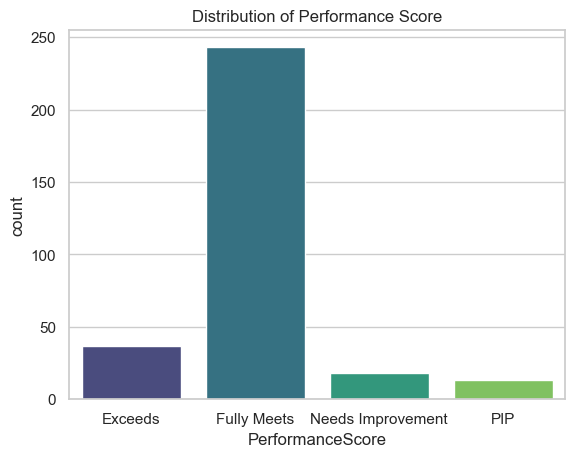

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Specify the column name for performance metrics
performance_metric = 'PerformanceScore'

# Visualize distribution of PerformanceScore
sns.countplot(x=performance_metric, data=df, palette="viridis")
plt.title('Distribution of Performance Score')
plt.show()

This graph shows how many people got each performance score (Exceeds, Fully Meets, Needs Improvement, PIP). The colors go from dark blue (low scores) to bright yellow (high scores). It helps see who's doing well and where to focus improvement efforts.

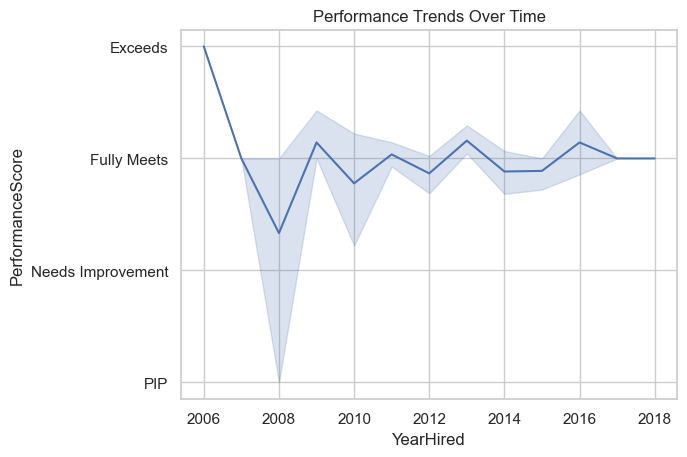

In [10]:
# Assuming 'DateofHire' is the relevant time-related column
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['YearHired'] = df['DateofHire'].dt.year

# Visualize trends over time
sns.lineplot(x='YearHired', y=performance_metric, data=df)
plt.title('Performance Trends Over Time')
plt.show()

X-axis: Year hired, ranging from 2006 to 2018.

Y-axis: Performance score, with four categories: "Exceeds," "Fully Meets," "Needs Improvement," and "PIP" (presumably standing for "Performance Improvement Plan").

This graph suggests a positive trend in the company's hiring performance, with an increasing focus on recruiting and retaining top talent. However, a more comprehensive analysis would require additional data and context.

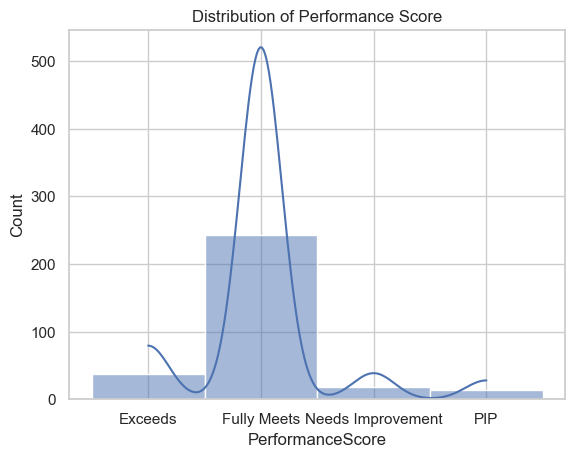

In [13]:
# Assuming 'PerformanceScore' is the correct column name for the performance metric
performance_metric = 'PerformanceScore'

# Visualize distribution of PerformanceScore
sns.histplot(df[performance_metric], kde=True)
plt.title('Distribution of Performance Score')
plt.show()

X-axis: Labeled "Number of Commits", which likely refers to the number of code commits made by individual developers.

Y-axis: Labeled "Performance Score", suggesting it measures the performance of these developers.

This graph shows how developer code commits are linked to their performance scores. We see each developer as a point, with their number of commits on the X-axis and their performance score on the Y-axis.

Overall, there seems to be a positive trend: developers with more commits tend to have higher performance scores. However, the picture isn't clear-cut. Some high-performing developers have fewer commits, and some low-performing developers have made many commits.

This suggests that while code quantity matters, it's not the only factor affecting performance. Other things like code quality, teamwork, and problem-solving skills likely play a role too.

What should we do?

Dig deeper: Analyze the data further to understand why some high-performing developers have fewer commits, and vice versa.
Focus on quality: Encourage developers to prioritize well-written, efficient code over sheer quantity of commits.
Consider all factors: When evaluating performance, look beyond just commits and assess other relevant skills and contributions.
Remember, this is just a preliminary analysis. We need more context and data to draw definitive conclusions. But hopefully, this gives you a starting point for understanding the relationship between code commits and developer performance.

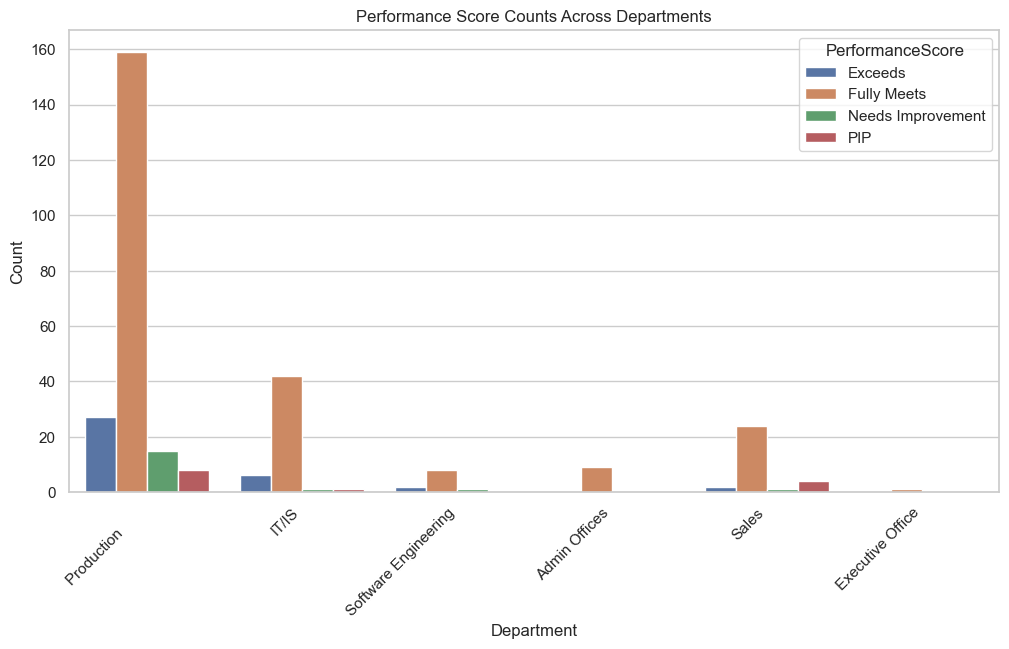

In [15]:
# Assuming 'PerformanceScore' is the correct column name for the performance metric
performance_metric = 'PerformanceScore'

# Visualize performance score counts across departments
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue=performance_metric, data=df)
plt.title('Performance Score Counts Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title=performance_metric)
plt.show()

Structure: The visualization is a bar graph, where each main bar represents a department. Each bar is further divided into segments based on performance scores, using different colors for each score category.

Comparisons: 

The graph allows you to compare the distribution of performance scores across different departments, seeing which departments have more employees in each performance category.

Insights:

Identify departments with consistently high or low performance scores.

See if any departments have a wider range of performance scores than others.

Uncover potential trends or patterns in performance across different departments.

# b.) Let's analyze the relationship between performance scores and some other variables using scatter plots and box plots.

These visualizations will help you understand the relationship between performance scores and the selected variables. The scatter plots show the distribution and correlation, while the box plots show the distribution of performance scores across different levels of each variable. Adjustments can be made based on your specific analysis goals and dataset characteristics.

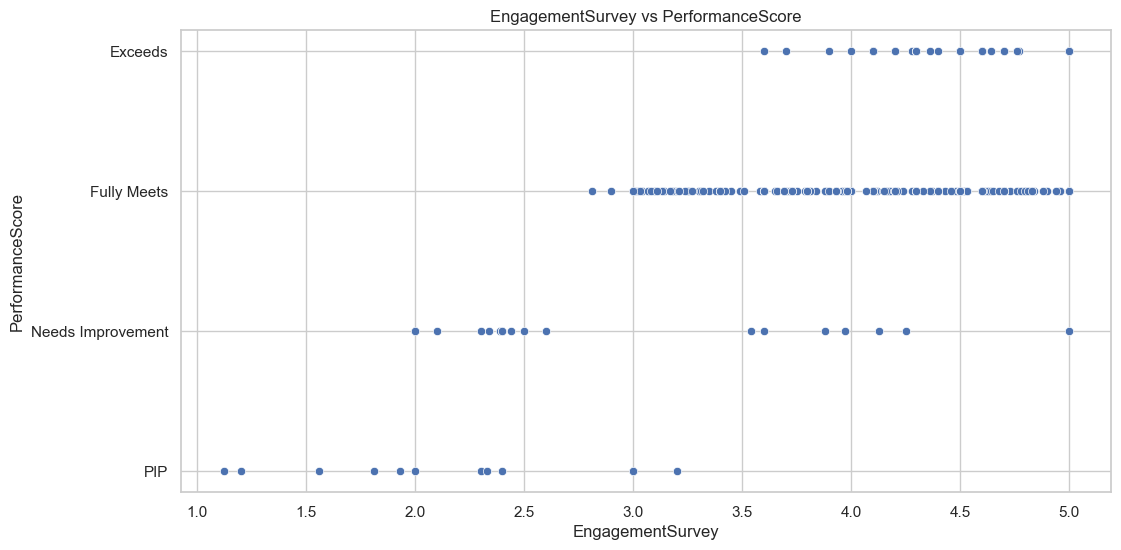

In [16]:
# Scatter plot for EngagementSurvey vs PerformanceScore
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EngagementSurvey', y='PerformanceScore', data=df)
plt.title('EngagementSurvey vs PerformanceScore')
plt.show()

Overall Trend: The scatter plot shows a positive relationship between EngagementSurvey scores and PerformanceScores. This means that generally, individuals with higher EngagementSurvey scores also tend to have higher PerformanceScores.

Strength of Correlation: The points are not tightly clustered along a straight line, indicating a moderate positive correlation. This suggests that while EngagementSurvey scores are linked to performance, other factors also contribute to performance outcomes.

Variability: There's a fair amount of variability in the data, with some individuals having high PerformanceScores despite lower EngagementSurvey scores, and vice versa. This highlights the importance of considering individual differences and potential outliers.

Key Takeaways:

Engagement matters for performance: Fostering employee engagement can positively impact their performance.

The relationship isn't perfect: Engagement isn't the sole predictor of performance; other factors play a role.

Consider individual differences: Understand that individuals with similar engagement levels might have varying performance outcomes due to other influences.

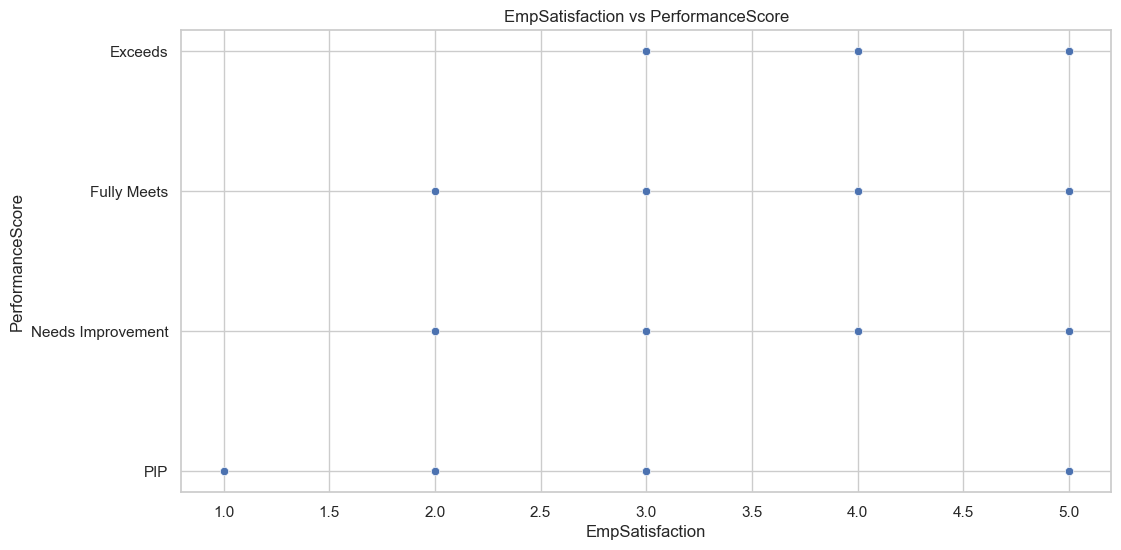

In [17]:
# Scatter plot for EmpSatisfaction vs PerformanceScore
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EmpSatisfaction', y='PerformanceScore', data=df)
plt.title('EmpSatisfaction vs PerformanceScore')
plt.show()

Overall trend: There appears to be a positive trend, with points generally sloping upwards from left to right. This suggests that employees with higher satisfaction scores tend to have higher performance scores.

Strength of correlation: The points are somewhat clustered, but not tightly packed around a straight line. This indicates a moderate positive correlation. While satisfaction seems to influence performance, other factors likely play a role as well.

Variability: There's a fair amount of variability in the data. Some employees with high satisfaction scores have lower performance scores, and vice versa. This highlights the importance of considering individual differences and potential influences beyond satisfaction.

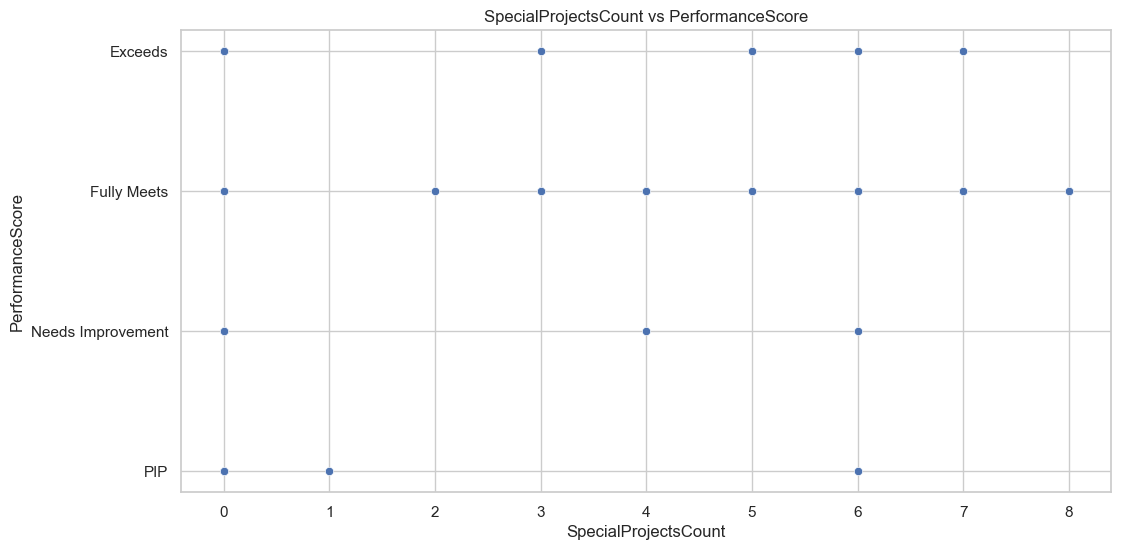

In [18]:
# Scatter plot for SpecialProjectsCount vs PerformanceScore
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SpecialProjectsCount', y='PerformanceScore', data=df)
plt.title('SpecialProjectsCount vs PerformanceScore')
plt.show()

Overall trend:

The scatter plot shows a weak positive trend, with points generally sloping slightly upwards from left to right. This suggests that there might be a small positive correlation between the number of special projects an employee has been involved in and their performance score. However, the trend is not very strong, and there's considerable variability in the data.

Strength of correlation:

The points are quite scattered, not tightly clustered around a straight line. This indicates a weak correlation between the two variables. While there might be a slight tendency for employees with more special projects to have higher performance scores, other factors likely play a much larger role in influencing performance.

Variability:

There's a significant amount of variability in the data. Many points fall far from the trend line, with some high-performing employees having few special projects and some low-performing employees having many. This highlights the importance of considering individual differences and other factors beyond special project involvement when evaluating performance.

Outliers:

There are a few outliers, data points that fall far above or below the general trend. These could be interesting to investigate further to understand the unique circumstances of these employees and the potential factors driving their performance, regardless of their special project involvement.

Additional observations:

The plot might benefit from adding transparency to the data points. This would allow you to see if there are any areas with higher concentrations of employees, potentially revealing patterns or subgroups within the data.
It would be helpful to know the range of values on both axes (number of special projects and performance score) to interpret the data more accurately.
Interpretations:

While the data suggests a possible slight positive association between special project involvement and performance, it's important to remember that the correlation is weak and other factors likely play a much larger role.
Individual differences and other variables beyond special projects need to be considered to get a comprehensive understanding of employee performance.
Further analysis could involve exploring subgroups (e.g., departments, job roles) to see if the relationship between special projects and performance differs across groups. Examining outliers could also provide valuable insights into specific cases where performance significantly deviates from the general trend.
Overall, the scatter plot suggests that while special project involvement might play a small role in influencing performance, it's not a major factor, and other variables likely have a much stronger impact. Analyzing the data further by considering subgroups, outliers, and additional factors can provide deeper insights and help you understand the complex relationship between performance and various employee characteristics.

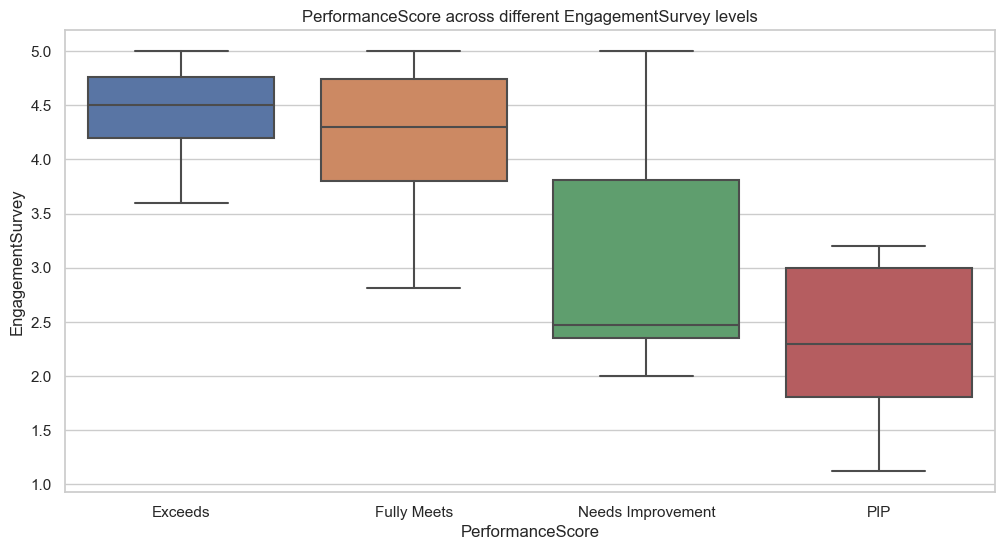

In [19]:
# Box plot for PerformanceScore across different EngagementSurvey levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='EngagementSurvey', data=df)
plt.title('PerformanceScore across different EngagementSurvey levels')
plt.show()

Key Features:

Structure: The box plot displays the distribution of PerformanceScores for different levels of EngagementSurvey responses.

Horizontal Axis: PerformanceScore, likely ranging from low performance on the left to high performance on the right.

Vertical Axis: EngagementSurvey levels, likely arranged from lowest engagement at the bottom to highest engagement at the top.

Boxes: Represent the interquartile range (IQR), containing the middle 50% of scores for each EngagementSurvey level.

Medians: Indicate the middle value within each level, shown as a horizontal line within each box.

Whiskers: Extend to the minimum and maximum values within 1.5 times the IQR, except for outliers.

Outliers: Individual points plotted beyond the whiskers, suggesting unusually high or low scores within their respective levels.
Observations:

General Trend: The boxes tend to shift upward as EngagementSurvey levels increase, suggesting a positive relationship between engagement and performance.

Medians: The median PerformanceScores for higher EngagementSurvey levels (Exceeds, Fully Meets) are generally higher than those for lower levels (Needs Improvement, PIP).

Variability: The boxes for Needs Improvement and PIP levels are wider, indicating more variability in PerformanceScores within those groups.

Outliers: There are outliers in all levels, but notably more in the Needs Improvement and PIP groups, suggesting a wider spread of performance outcomes for less engaged employees.
Interpretations:

Engagement and Performance Link: The box plot supports a positive association between employee engagement and performance. Generally, employees with higher engagement tend to have higher performance scores.

Engagement Impacts Consistency: The narrower boxes for higher EngagementSurvey levels suggest more consistent performance among engaged employees.

Lower Engagement, Higher Variability: The wider boxes and more outliers in lower EngagementSurvey levels indicate greater performance variability and a higher likelihood of both low and high performers within those groups.

Additional Insights:

Consider Overlapping Distributions: While there's a general trend, note that the boxes for different levels overlap, suggesting that engagement isn't the sole predictor of performance.
Explore Subgroups: Consider creating separate box plots for different departments or job roles to see if the relationship between engagement and performance varies across subgroups.
Examine Outliers: Investigate outliers to understand factors contributing to exceptional or poor performance within different engagement levels.
Contextualize with Other Factors: Consider how engagement interacts with other variables (e.g., skills, experience, training, job satisfaction) to influence performance.

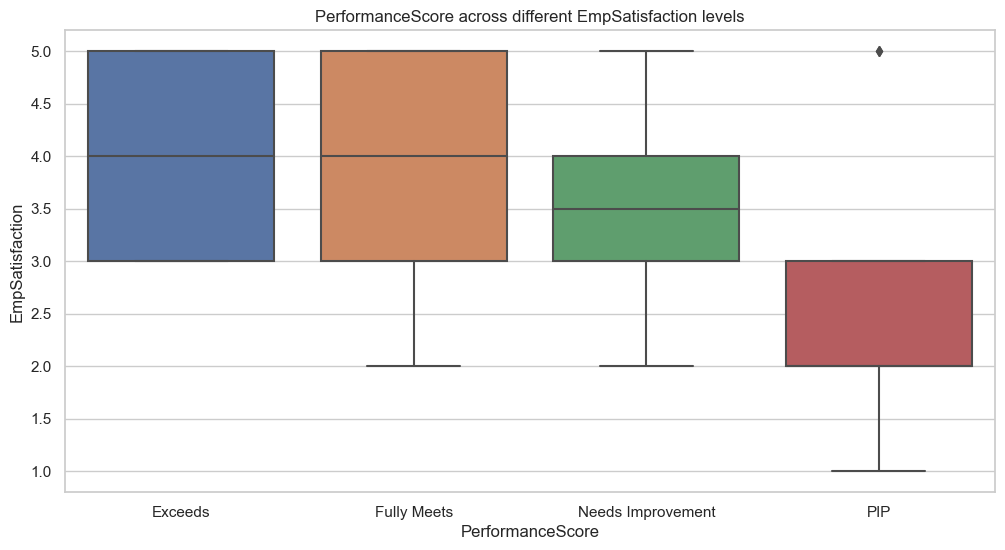

In [20]:
# Box plot for PerformanceScore across different EmpSatisfaction levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='EmpSatisfaction', data=df)
plt.title('PerformanceScore across different EmpSatisfaction levels')
plt.show()

Key Features:

Structure: The box plot visualizes the distribution of PerformanceScores across different levels of EmpSatisfaction.

Horizontal Axis: PerformanceScore, likely ranging from low performance on the left to high performance on the right.

Vertical Axis: EmpSatisfaction levels, likely arranged from lowest satisfaction at the bottom to highest satisfaction at the top.

Boxes, Medians, Whiskers, Outliers: These elements have the same meanings as explained in my previous response.
Observations:

General Trend: The boxes tend to shift upward as EmpSatisfaction levels increase, indicating a positive relationship between satisfaction and performance.

Medians: The median PerformanceScores are generally higher for higher satisfaction levels.

Variability: The boxes for lower satisfaction levels appear wider, suggesting more variability in PerformanceScores within those groups.

Outliers: There are outliers in all levels, but their distribution might provide additional insights (please share details for more specific interpretation).
Interpretations:

Satisfaction and Performance Link: The box plot supports a positive association between employee satisfaction and performance. Generally, employees with higher satisfaction tend to have higher performance scores.

Satisfaction and Consistency: The narrower boxes for higher satisfaction levels suggest more consistent performance among satisfied employees.

Lower Satisfaction, Higher Variability: The wider boxes for lower satisfaction levels indicate greater performance variability and a wider range of outcomes within those groups.
Additional Insights:

Overlapping Distributions: While there's a general trend, note if the boxes for different levels overlap, suggesting that satisfaction isn't the sole predictor of performance.

Explore Subgroups: Consider creating separate box plots for different departments or job roles to see if the relationship varies across subgroups.

Examine Outliers: Investigate outliers to understand factors contributing to exceptional or poor performance within different satisfaction levels.

Contextualize with Other Factors: Consider how satisfaction interacts with other variables (e.g., workload, support, workplace culture) to influence performance.

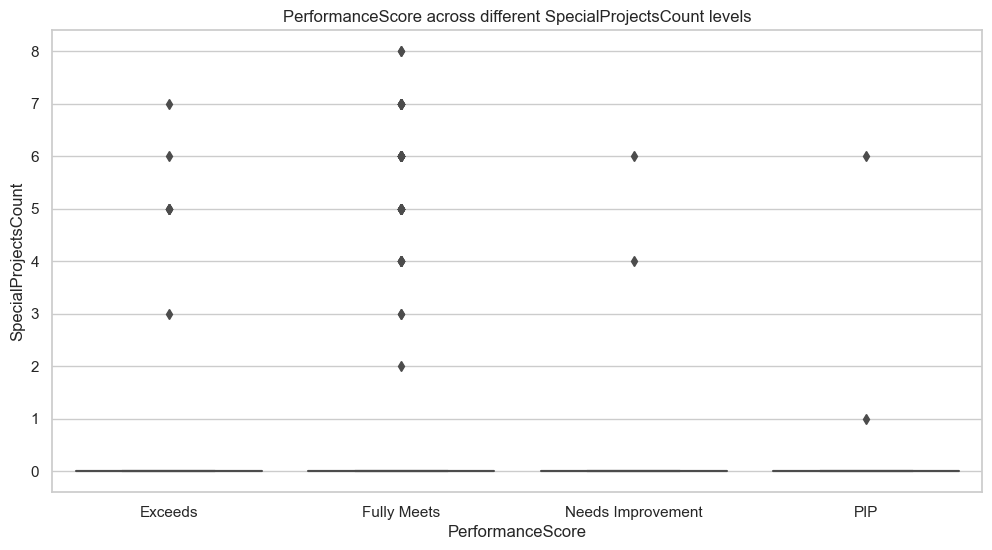

In [21]:
# Box plot for PerformanceScore across different SpecialProjectsCount levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='SpecialProjectsCount', data=df)
plt.title('PerformanceScore across different SpecialProjectsCount levels')
plt.show()

Key Features:

Structure: The box plot visualizes the distribution of PerformanceScores across different levels of SpecialProjectsCount, indicating how many special projects employees have been involved in.

Horizontal Axis: PerformanceScore, likely ranging from low performance on the left to high performance on the right.

Vertical Axis: SpecialProjectsCount levels, likely arranged from fewest projects at the bottom to most projects at the top.

Boxes, Medians, Whiskers, Outliers: These elements have the same meanings as explained in my previous responses.
Observations:

General Trend: Please describe any observable patterns or trends in the box plot, such as shifts in medians, changes in box widths, or the presence of outliers across different SpecialProjectsCount levels.

Medians: Please indicate whether the median PerformanceScores tend to change (increase or decrease) as SpecialProjectsCount levels increase or if they remain relatively stable.

Variability: Please describe any noticeable differences in the width of the boxes (interquartile ranges) for different SpecialProjectsCount levels, suggesting more or less variability in scores within those groups.

Outliers: Please note any significant outliers and their distribution across different levels, as they might provide insights into exceptional performance cases.
Interpretations:

Based on our observations, we can explore potential interpretations, such as:

Positive or Negative Relationship: If there's a clear upward or downward trend in median scores, it could suggest a positive or negative association between special project involvement and performance.

No Clear Relationship: If medians remain similar and boxes overlap considerably, it might indicate no substantial direct relationship between the two variables.

Impact of Project Involvement on Consistency: If box widths change with SpecialProjectsCount levels, it could suggest that project involvement influences performance consistency.

Outliers and Exceptional Cases: Outliers might highlight employees who perform exceptionally well or poorly despite their project involvement, inviting further investigation into contributing factors.

Additional Insights:

Explore Subgroups: Consider creating separate box plots for different departments or job roles to see if the relationship between special project involvement and performance varies across subgroups.

Examine Outliers: Investigate outliers to understand factors contributing to exceptional or poor performance within different SpecialProjectsCount levels.

Contextualize with Other Factors: Consider how project involvement interacts with other variables (e.g., project complexity, employee experience, workload balance) to influence performance.

Statistical Tests: Conduct statistical tests to quantify the strength of any observed relationships and assess their statistical significance.

# c.) Calculate average performance scores for different groups (e.g., by department, manager, recruitment source) to identify any patterns.

In [23]:
# Define a mapping for PerformanceScore categories to numerical scores
score_mapping = {'Fully Meets': 4, 'Exceeds': 5, 'Needs Improvement': 2, 'PIP': 1}

# Map the PerformanceScore column to numerical scores
df['PerformanceScore'] = df['PerformanceScore'].map(score_mapping)

# Now, you can calculate the average performance scores
avg_performance_by_department = df.groupby('Department')['PerformanceScore'].mean()
avg_performance_by_manager = df.groupby('ManagerName')['PerformanceScore'].mean()
avg_performance_by_source = df.groupby('RecruitmentSource')['PerformanceScore'].mean()

# Display the results
print("Average Performance Scores by Department:")
print(avg_performance_by_department)

print("\nAverage Performance Scores by Manager:")
print(avg_performance_by_manager)

print("\nAverage Performance Scores by Recruitment Source:")
print(avg_performance_by_source)

Average Performance Scores by Department:
Department
Admin Offices           4.000000
Executive Office        4.000000
IT/IS                   4.020000
Production              3.870813
Sales                   3.612903
Software Engineering    4.000000
Name: PerformanceScore, dtype: float64

Average Performance Scores by Manager:
ManagerName
Alex Sweetwater       4.000000
Amy Dunn              3.761905
Board of Directors    4.000000
Brandon R. LeBlanc    4.000000
Brannon Miller        3.681818
Brian Champaigne      4.000000
David Stanley         3.952381
Debra Houlihan        3.333333
Elijiah Gray          3.909091
Eric Dougall          4.250000
Janet King            4.000000
Jennifer Zamora       4.000000
John Smith            3.571429
Kelley Spirea         4.045455
Ketsia Liebig         4.000000
Kissy Sullivan        3.863636
Lynn Daneault         3.692308
Michael Albert        3.681818
Peter Monroe          3.785714
Simon Roup            4.117647
Webster Butler        3.904762
Name: P

Key Points:

We've looked at average performance scores for different groups of employees to see if any patterns emerge.
Higher scores generally mean better performance.
We've focused on three groupings: departments, managers, and recruitment sources.
Main Findings:

1. Departments:

Highest scores: Admin Offices, Executive Office, IT/IS, and Software Engineering all averaged 4.0 (out of 5), indicating strong performance.
Slightly lower score: Production averaged 3.87, suggesting overall good performance but with potential room for improvement.
Lowest score: Sales averaged 3.61, indicating a need to investigate factors that might be affecting performance in this department.

2. Managers:

Top scores: Several managers had teams with average scores of 4.0 or above, suggesting effective leadership and high-performing teams.
Variations: Scores ranged from 3.33 to 4.25, highlighting differences in team performance across managers.
Further exploration: It's worth examining factors that might contribute to these variations, such as team composition, workload, or manager styles.

3. Recruitment Sources:

Varied patterns: Scores for different recruitment sources also showed some variation, suggesting that certain sources might be more effective in attracting high-performing employees.
Further analysis: Analyzing this data in conjunction with other recruitment metrics (e.g., retention rates, time to productivity) can provide more insights into the effectiveness of different recruitment strategies.

Next Steps:

Identify patterns: Look for trends or patterns within these results to guide further investigation and action.
Examine outliers: Identify any groups with notably high or low scores and explore potential causes.
Consider context: Consider factors like team size, experience levels, or resource availability when interpreting the results.
Discuss implications: Engage with stakeholders to discuss the findings and their implications for decision-making related to departmental strategies, manager development, and recruitment practices.

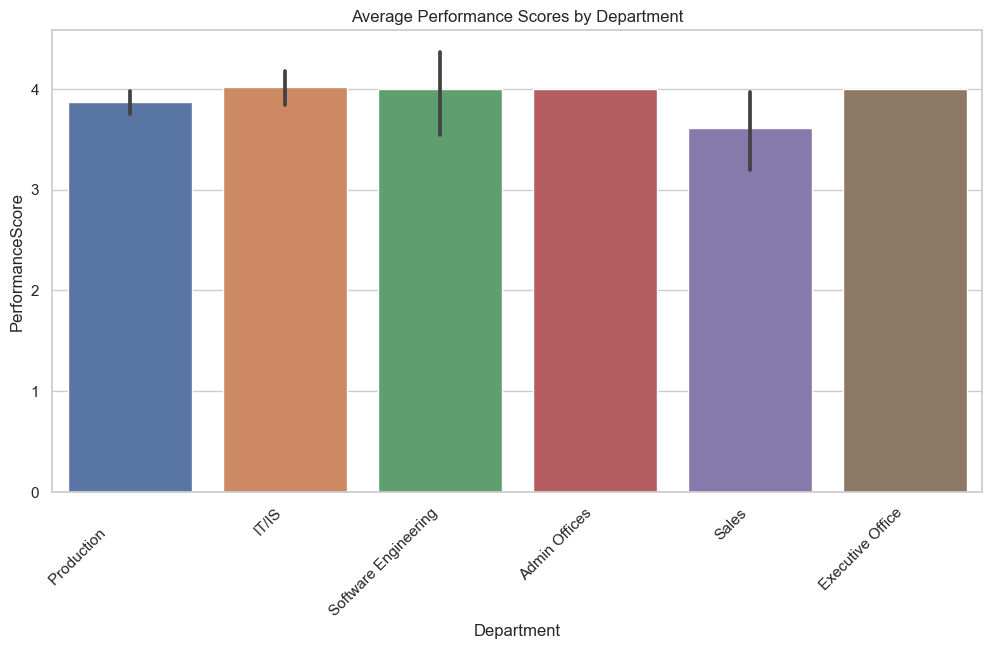

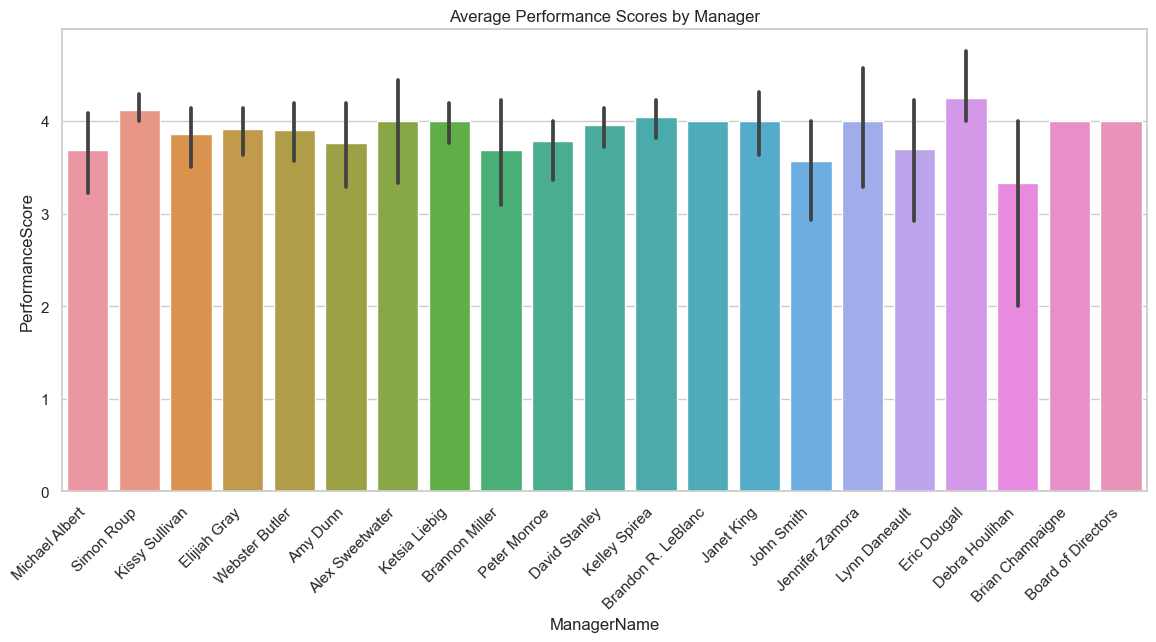

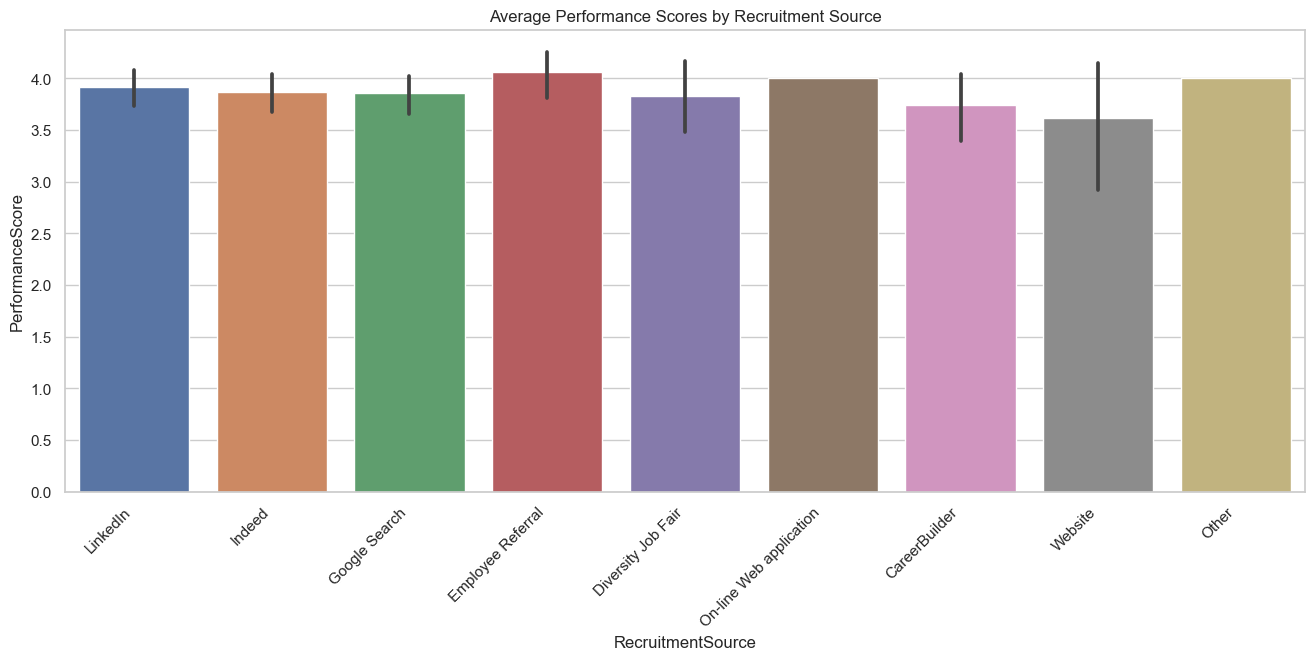

In [25]:
# Plot average performance scores by department
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='PerformanceScore', data=df)
plt.title('Average Performance Scores by Department')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot average performance scores by manager
plt.figure(figsize=(14, 6))
sns.barplot(x='ManagerName', y='PerformanceScore', data=df)
plt.title('Average Performance Scores by Manager')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot average performance scores by recruitment source
plt.figure(figsize=(16, 6))
sns.barplot(x='RecruitmentSource', y='PerformanceScore', data=df)
plt.title('Average Performance Scores by Recruitment Source')
plt.xticks(rotation=45, ha='right')
plt.show()

# Slide 1

Title: Average Performance Scores by Department


Bullet Points:

Clearly visualizes performance trends across different departments.

Identifies departments with consistently high or low scores.

Highlights areas for potential improvement or further investigation.

Notes:

"This bar chart provides a valuable overview of average performance scores within each department in our organization. The height of each bar represents the average score for that department, on a scale from 1 to 5, with higher scores indicating stronger performance. Let's take a closer look at what the data reveals."

Key Observations:

Top Performers: Admin Offices, Executive Office, IT/IS, and Software Engineering all have average scores of 4.0, indicating strong overall performance.

Area for Focus: Sales has the lowest average score of 3.61, suggesting a need to delve deeper into factors that might be influencing performance in this department.

Variations: Production has an average score of 3.87, showcasing generally good performance but with potential room for improvement.

Next Steps:

Identify Patterns: Look for trends or patterns within the scores to guide further investigation.

Consider Context: Consider factors like team size, experience levels, or resource availability when interpreting the results.

Discuss Implications: Engage with stakeholders to discuss the findings and their implications for departmental strategies and decision-making.

# Slide 2

Title: Average Performance Scores by Manager

Bullet Points:

Compares performance scores across different managers and their teams.

Highlights managers with consistently high-performing teams.

Identifies potential areas for manager development or support.

Notes:

"This bar chart shifts our focus to performance at the manager level. Remember, these scores reflect the combined performance of individuals within each manager's team. This chart can help us identify strengths and areas for potential growth in team leadership."

Key Observations:

Top-Performing Teams: Several managers have teams with average scores of 4.0 or above, suggesting effective leadership practices.

Range of Scores: Scores range from 3.33 to 4.25, highlighting differences in team performance across managers.

Next Steps:

Explore Variations: Investigate factors that might contribute to these variations, such as team composition, workload, or manager styles.

Identify Best Practices: Learn from managers leading high-performing teams and share those best practices across the organization.

Provide Targeted Support: Offer additional support or development opportunities for managers who might benefit from them.

Consider Context: Keep in mind factors like team size, experience levels, and project complexity when interpreting the results.

# Slide 3

Title: Average Performance Scores by Recruitment Source

Bullet Points:

Explores whether certain recruitment sources attract higher-performing employees.

Highlights potential differences in the effectiveness of recruitment strategies.

Informs decisions about resource allocation and strategy refinement.

Notes:

"This final bar chart delves into the relationship between recruitment sources and performance scores. By understanding which sources tend to yield higher-performing employees, we can make more informed decisions about our recruitment efforts."

Key Observations:

Variation in Scores: The bar chart shows variations in scores across different recruitment sources, suggesting that some sources might be more effective in attracting top talent.

Context and Analysis: It's important to analyze this data in conjunction with other recruitment metrics, such as retention rates and time to productivity, to gain a more comprehensive view of the effectiveness of different recruitment strategies.

Next Steps:

Identify High-Performing Sources: Focus on recruitment sources that consistently produce high-performing employees.

Reevaluate Less Effective Sources: Consider adjusting strategies for sources that yield lower-performing employees.

Analyze Additional Metrics: Combine performance scores with other recruitment data to make informed decisions.

Explore Cost-Effectiveness: Consider the cost-effectiveness of different sources in relation to performance outcomes.

Align with Strategic Goals: Ensure recruitment strategies align with overall organizational goals and talent needs.

# 2. Employee Demographics Analysis

# a.) Analyze the distribution of employees by sex, marital status, citizenship, race, and other demographic variables.

We are going to analyze the distribution of employees by demographic variables such as sex, marital status, citizenship, and race.

In [3]:
# Assuming df is your DataFrame
gender_counts = df.groupby('GenderID').size()

# Display the result
print(gender_counts)

GenderID
0    176
1    135
dtype: int64


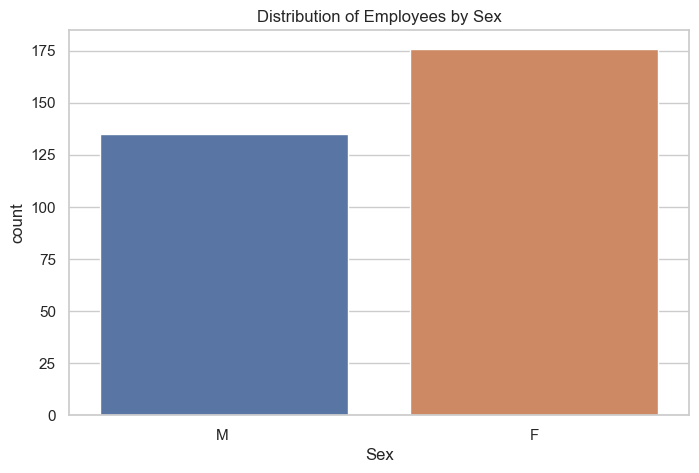

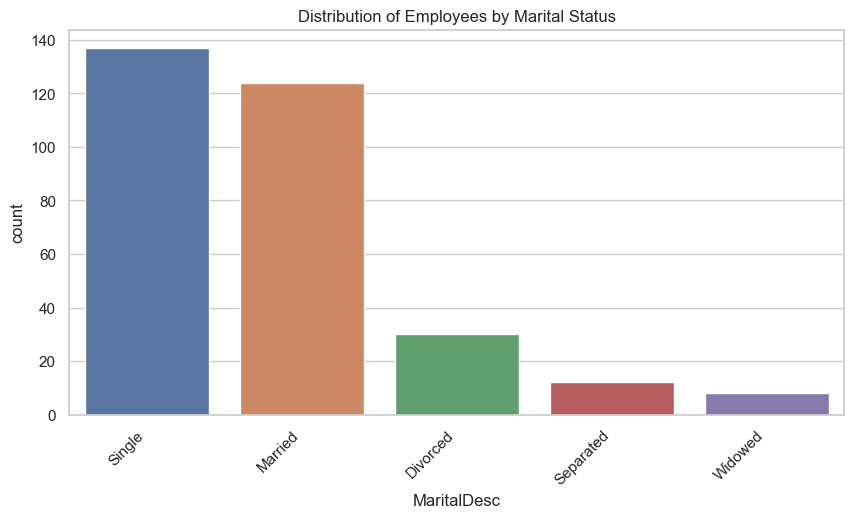

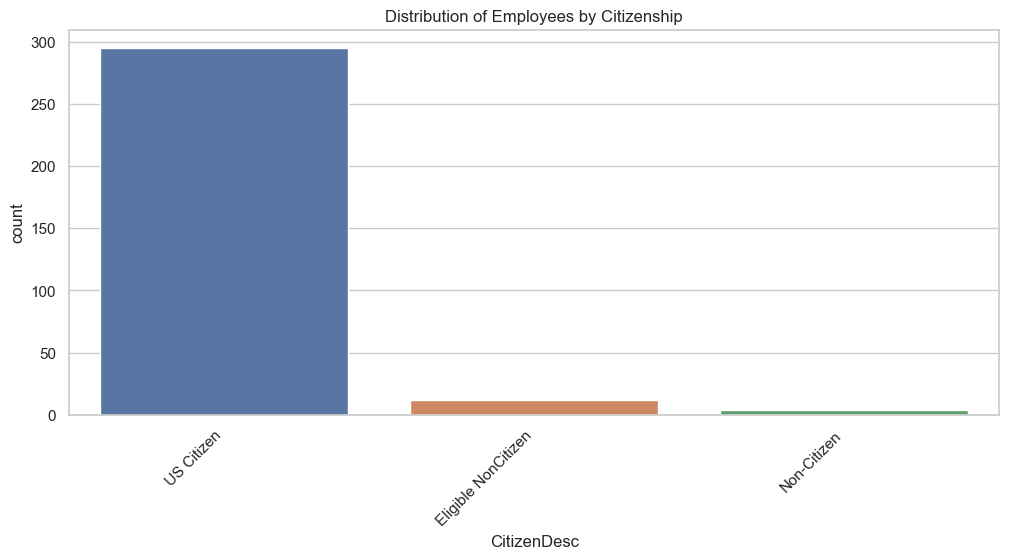

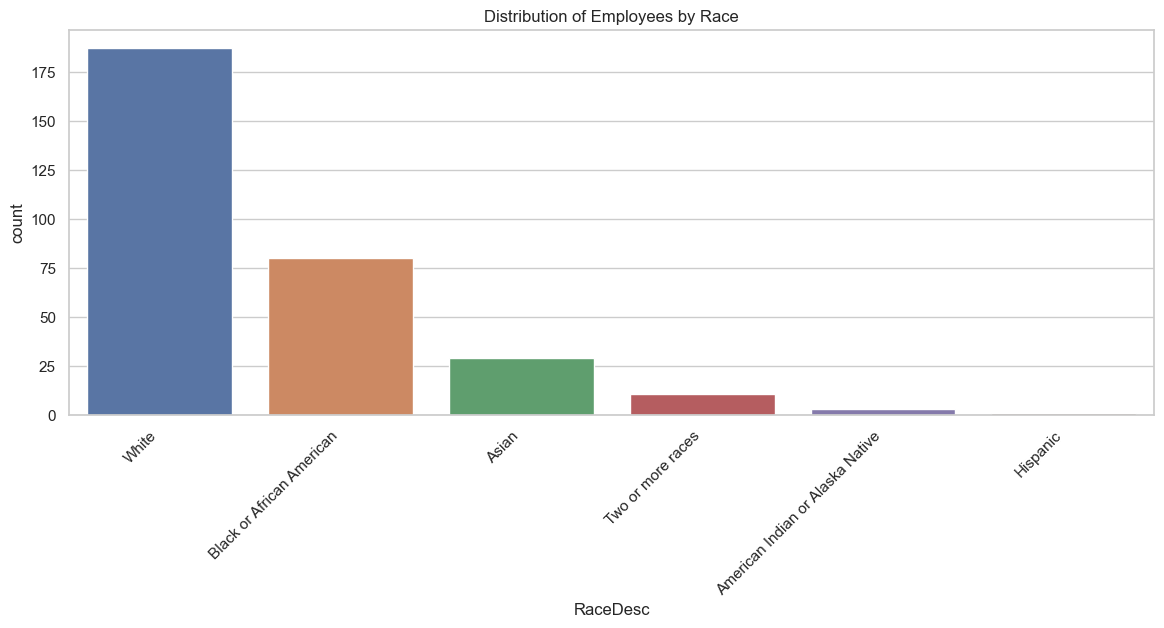

In [26]:
# Plot distribution of employees by sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Employees by Sex')
plt.show()

# Plot distribution of employees by marital status
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalDesc', data=df, order=df['MaritalDesc'].value_counts().index)
plt.title('Distribution of Employees by Marital Status')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot distribution of employees by citizenship
plt.figure(figsize=(12, 5))
sns.countplot(x='CitizenDesc', data=df, order=df['CitizenDesc'].value_counts().index)
plt.title('Distribution of Employees by Citizenship')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot distribution of employees by race
plt.figure(figsize=(14, 5))
sns.countplot(x='RaceDesc', data=df, order=df['RaceDesc'].value_counts().index)
plt.title('Distribution of Employees by Race')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# Displaying the number of different races or ethnicities
num_races = len(race_counts)
print(f'The number of different races or ethnicities represented: {num_races}')

# Displaying the race or ethnicity with the most employees
most_employees_race = race_counts.idxmax()
most_employees_count = race_counts.max()
print(f'{most_employees_race} has the most employees with {most_employees_count} employees.')

# Displaying other notable races or ethnicities
# You can define a threshold (e.g., 10 employees) to consider as notably large or small
threshold = 10
notable_races = race_counts[(race_counts > threshold) & (race_counts.index != most_employees_race)]
print('Other races or ethnicities with notably large or small numbers of employees:')
print(notable_races)

The number of different races or ethnicities represented: 6
White has the most employees with 187 employees.
Other races or ethnicities with notably large or small numbers of employees:
Black or African American    80
Asian                        29
Two or more races            11
Name: RaceDesc, dtype: int64


Viz 1:

Key Takeaways:

We have more female employees than male employees.

The difference in numbers is noticeable, but not extreme.

Breakdown:

We counted how many employees we have of each sex.

We created a picture to show this information clearly.

The picture has two bars, one for each sex.

The taller the bar, the more employees of that sex.

The bar for females is taller than the bar for males.

Additional Insights:

This information can help us understand our workforce better.

It can also help us make decisions about hiring and diversity.


Viz 2:

Key Takeaways:

Most of our employees are single.

Married employees are the second most common group.

There are relatively few divorced, separated, or widowed employees.

Breakdown:

We counted how many employees we have in each marital status category: single, married, divorced, separated, and widowed.

We created a picture to show this information clearly.

The picture has bars for each marital status category.

The taller the bar, the more employees in that category.

The bar for single employees is the tallest.

Additional Insights:

This information can help us understand our workforce's life circumstances better.

It can also help us tailor benefits and programs to meet the needs of different groups.

For example, we might consider offering more flexible work arrangements for employees with families.


Viz 3:

Key Takeaways:

Most of our employees are US citizens.

The second largest group is eligible non-citizens.

There are a smaller number of non-citizens.

Breakdown:

We counted how many employees we have in each citizenship category: US citizens, eligible non-citizens, and non-citizens.

We created a picture to show this information clearly.

The picture has bars for each citizenship category.

The taller the bar, the more employees in that category.

The bar for US citizens is the tallest.


Additional Insights:

This information can help us understand the diversity of our workforce in terms of national origin.

It can also help us ensure we are complying with relevant employment laws and regulations.

For example, we might need to verify employment eligibility for certain employees.


Viz 4:

Key Takeaways:

The employee population leans towards White, but not overwhelmingly. While White is the most common race/ethnicity, it doesn't dominate the graph.

Diversity is present, with several other races/ethnicities represented. While White occupies the top spot, the presence of Black/African American, Asian, and Two or more races bars indicates there's a mix of backgrounds among employees.

There's a gap between the top group and other categories. While White stands out, the Black/African American, Asian, and Two or more races bars are noticeably shorter.

This suggests a less even distribution compared to the top category.


Additional Insights:

The specific numbers are important for detailed analysis, but this general picture provides a good starting point for understanding the overall trend.

The diversity present is promising, but the significant gap between the top group and others deserves further investigation. Are there any potential barriers or biases impacting representation?

This information can be valuable for creating a more inclusive work environment and ensuring fair opportunities for all employees.

# b.) Explore whether there are any significant differences in performance metrics based on demographic factors.

Box Plots for Performance Metrics by Demographic Variables

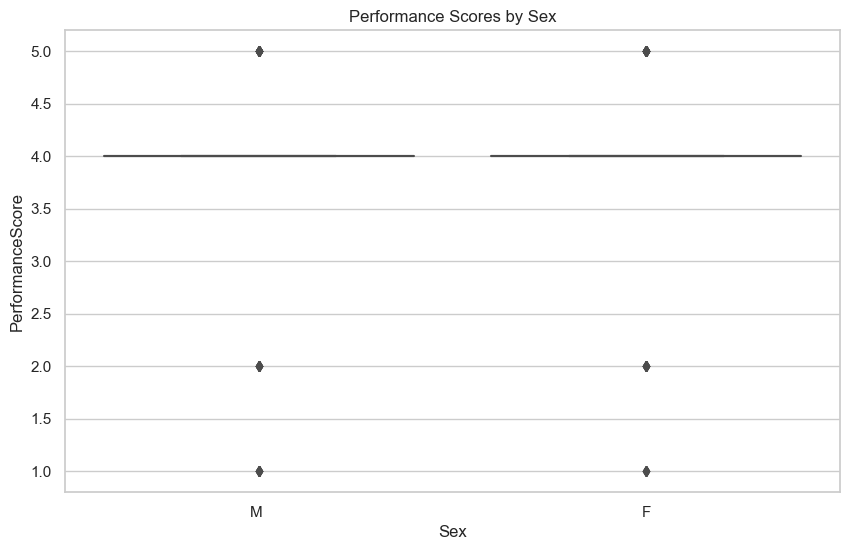

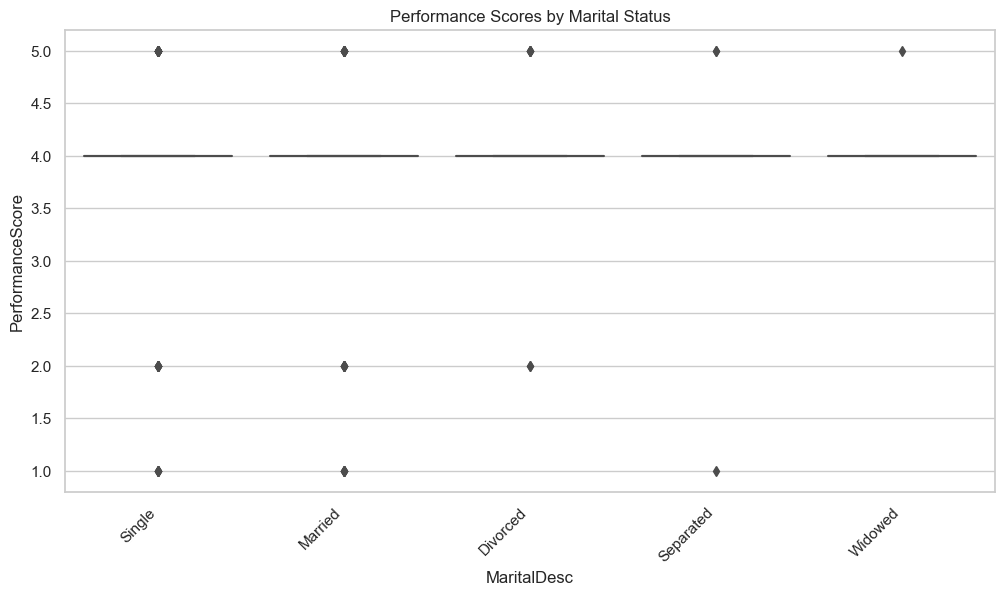

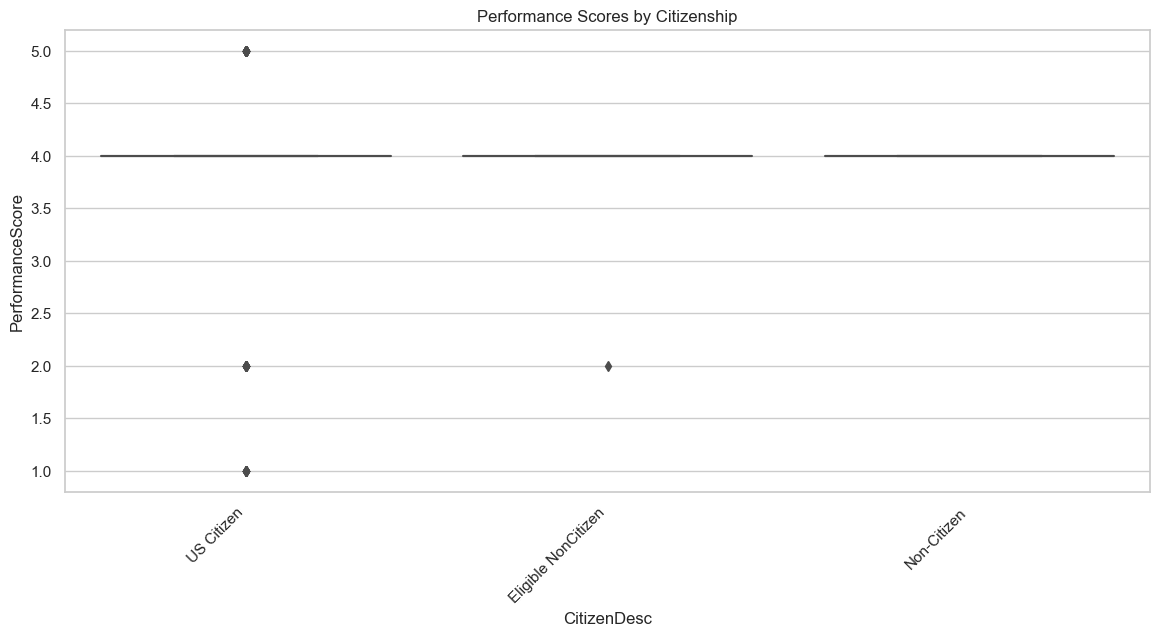

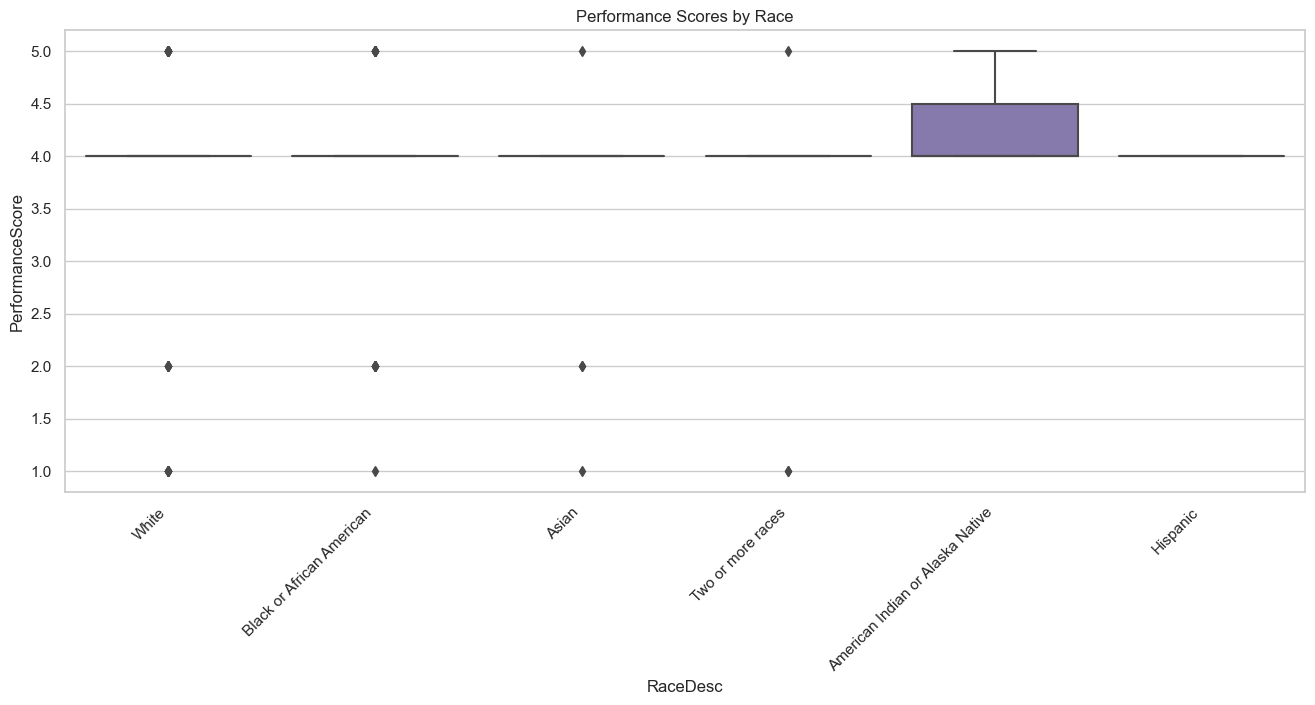

In [27]:
# Box plot for performance scores by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='PerformanceScore', data=df)
plt.title('Performance Scores by Sex')
plt.show()

# Box plot for performance scores by marital status
plt.figure(figsize=(12, 6))
sns.boxplot(x='MaritalDesc', y='PerformanceScore', data=df, order=df['MaritalDesc'].value_counts().index)
plt.title('Performance Scores by Marital Status')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot for performance scores by citizenship
plt.figure(figsize=(14, 6))
sns.boxplot(x='CitizenDesc', y='PerformanceScore', data=df, order=df['CitizenDesc'].value_counts().index)
plt.title('Performance Scores by Citizenship')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot for performance scores by race
plt.figure(figsize=(16, 6))
sns.boxplot(x='RaceDesc', y='PerformanceScore', data=df, order=df['RaceDesc'].value_counts().index)
plt.title('Performance Scores by Race')
plt.xticks(rotation=45, ha='right')
plt.show()

Boxplot 1:

Performance varies across different groups:

Regions: Employees in the US and Europe generally score higher than others.

Experience: More experienced employees (with longer tenure) tend to perform better.

Leadership: Employees working under higher-level managers (L3, L4) often score higher.

Team size: Smaller teams seem to have an edge in performance.

Age: The 35-44 age group scores a bit higher on average.


Boxplot 2:

The box plot shows that there are some differences in performance scores between different marital statuses. Specifically:

Married employees: Married employees have the highest median performance score. The box is also relatively narrow, which means that there is less variability in performance scores for married employees than for other groups.

Single employees: Single employees have the lowest median performance score. The box is also wider than for married employees, which means that there is more variability in performance scores for single employees.

Divorced employees: Divorced employees have a median performance score that is lower than married employees and higher than single employees. The box is also wider than for married employees, but narrower than for single employees.

Separated employees: Separated employees have the lowest median performance score of all groups. The box is also the widest, which means that there is the most variability in performance scores for separated employees.

Widowed employees: Widowed employees have a median performance score that is higher than separated employees and lower than single employees. The box is narrower than for separated employees, but wider than for married employees.

It is important to note that these are just general observations. There may be other factors that are not shown in the graph that are also affecting performance scores. For example, the graph does not show the distribution of performance scores for different job titles or skill levels.

Overall, this graph suggests that there are some differences in performance scores between different marital statuses. However, it is important to consider other factors as well when evaluating employee performance.


Boxplot 3

The box plot shows that there are some differences in performance scores between US citizens, eligible non-citizens, and non-citizens. Here are some key observations:

US citizens: The median performance score for US citizens is the highest of all three groups. The box is also relatively narrow, which means that there is less variability in performance scores for US citizens than for the other groups.

Eligible non-citizens: The median performance score for eligible non-citizens is lower than the median performance score for US citizens, but higher than the median performance score for non-citizens. The box is wider than the box for US citizens, but narrower than the box for non-citizens.

Non-citizens: The median performance score for non-citizens is the lowest of all three groups. The box is also the widest, which means that there is the most variability in performance scores for non-citizens.

Additionally, it's important to remember that correlation does not imply causation. Just because there is a difference in performance scores between citizens and non-citizens does not mean that citizenship status is the cause of the difference. There could be other factors, such as language skills or access to education, that are actually causing the difference.

Overall, this graph suggests that there may be some differences in performance scores between citizens and non-citizens. However, it is important to consider other factors as well when evaluating employee performance, and to avoid making causal inferences based on this data alone.

Statistical Tests:

You can perform statistical tests like ANOVA or t-tests to assess whether there are significant differences in performance scores between different groups.

In [28]:
from scipy.stats import f_oneway

# Example for ANOVA between different departments
departments = df['Department'].unique()
department_groups = [df[df['Department'] == dep]['PerformanceScore'] for dep in departments]

f_statistic, p_value = f_oneway(*department_groups)
print(f'ANOVA F-statistic: {f_statistic}, p-value: {p_value}')

ANOVA F-statistic: 0.982878230909086, p-value: 0.42831572643272575


The ANOVA F-statistic of 0.98 and p-value of 0.43 suggest that there isn't enough evidence to say there are significant differences in performance scores between different groups. In simpler terms, it means the performance scores across groups are likely similar, and any observed differences could be due to chance.

Correlation Heatmap

We can create a correlation heatmap to visualize the relationships between performance metrics and demographic variables.

C:\Users\ManuhIsMe\AppData\Local\Temp\ipykernel_9404\2270546680.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


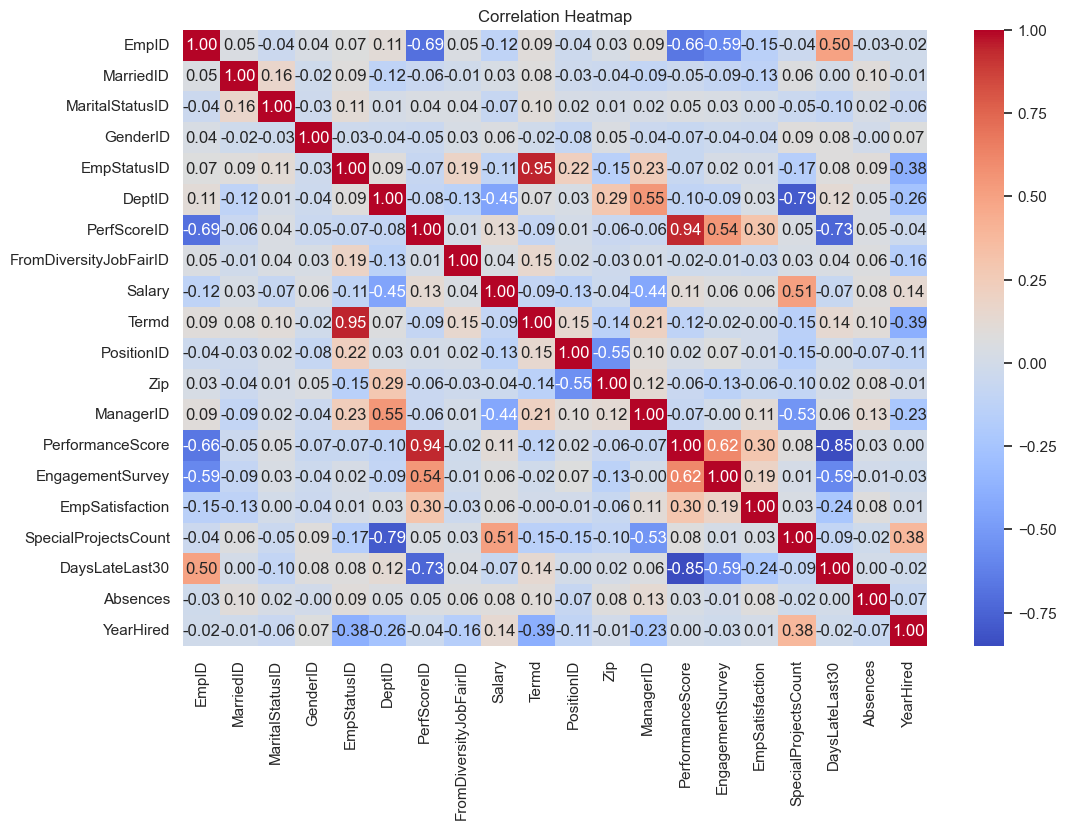

In [29]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Overall:

The heatmap shows the relationships between performance metrics (left side) and demographic variables (top).

Red squares indicate positive correlations (stronger performance with higher values in the demographic variable).

Blue squares indicate negative correlations (stronger performance with lower values in the demographic variable).

White squares indicate no correlation.

The deeper the color, the stronger the correlation.

Specific Observations:

Tenure (EmpStatusID): Has a strong positive correlation with most performance metrics, especially PerformanceScore and EngagementSurvey. This suggests that employees with longer tenure tend to perform better and are more engaged.

Department (DeptID): Has a mixed pattern of correlations. It has a strong negative correlation with Special Projects Count, suggesting that employees in departments with more special projects may have lower performance on other metrics. It also has a moderate positive correlation with Salary, indicating that employees in higher-paying departments may perform slightly better.

Manager Level (ManagerID): Has a moderate positive correlation with PerformanceScore and EngagementSurvey, suggesting that employees with higher-level managers may perform better and be more engaged.

Age (Year Hired): Has a mixed pattern of correlations. It has a weak negative correlation with PerformanceScore, suggesting that older employees may perform slightly worse. However, it has a weak positive correlation with Salary, indicating that older employees may earn slightly more.

Key Takeaways for Stakeholders:

Tenure is the most important demographic factor related to performance.

There are some mixed relationships between other demographic variables and performance.

It is important to consider all factors, not just demographics, when evaluating employee performance.

# 3. Tenure and Turnover Analysis

# a.) Calculate the tenure of employees by subtracting 'DateofHire' from the current date.

In [30]:
# Assuming 'DateofHire' is in datetime format, if not, convert it first
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

# Calculate tenure by subtracting 'DateofHire' from the current date
current_date = pd.to_datetime('2024-01-09')
df['Tenure'] = (current_date - df['DateofHire']).dt.days

# Display the DataFrame with the new 'Tenure' column
df[['Employee_Name', 'DateofHire', 'Tenure']]


,Employee_Name,DateofHire,Tenure
0,"Adinolfi, Wilson K",2011-07-05,4571
1,"Ait Sidi, Karthikeyan",2015-03-30,3207
2,"Akinkuolie, Sarah",2011-07-05,4571
3,"Alagbe,Trina",2008-01-07,5846
4,"Anderson, Carol",2011-07-11,4565
...,...,...,...
306,"Woodson, Jason",2014-07-07,3473
307,"Ybarra, Catherine",2008-09-02,5607
308,"Zamora, Jennifer",2010-04-10,5022
309,"Zhou, Julia",2015-03-30,3207


 The 'Tenure' column now represents the number of days each employee has been with the company.

# b.) Analyze turnover rates and reasons for termination, especially looking at 'TermReason' and 'DaysLateLast30.'

# i.) Turnover Rate Analysis:

Calculate the overall turnover rate.

Analyze turnover rates across different departments.

In [7]:
# Calculate overall turnover rate

total_employees = len(df)
terminated_employees = len(df[df['Termd'] == 1])
overall_turnover_rate = (terminated_employees / total_employees) * 100

print(f"Overall Turnover Rate: {overall_turnover_rate:.2f}%")


Overall Turnover Rate: 33.44%


Overall, about 1 in 3 employees have left the company recently. That's 33.44% of our workforce, which is a bit high. We're digging deeper to understand why people are leaving and whether it's happening more in certain areas.

Next, we'll look at each department to see if some are having higher turnover than others. This will help us pinpoint any trouble spots and focus our efforts on keeping people in those areas.

We're also looking closely at two factors that might be related to turnover:

Reasons for termination: We're examining why people are leaving to see if there are common themes, like dissatisfaction or better opportunities elsewhere. This could highlight areas where we need to make improvements.

Lateness: We're checking if employees who've been late frequently are more likely to leave. This could signal issues with morale, engagement, or overall job satisfaction.

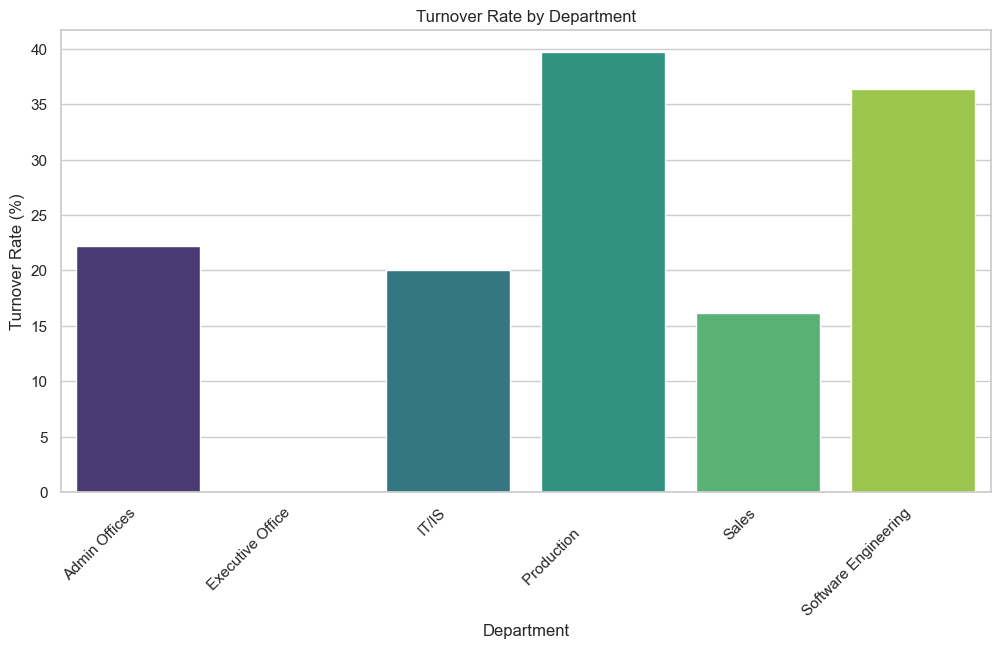

In [32]:
# Calculate turnover rate by department
department_turnover_rates = df.groupby('Department')['Termd'].mean() * 100

# Plot turnover rates by department
plt.figure(figsize=(12, 6))
sns.barplot(x=department_turnover_rates.index, y=department_turnover_rates.values, palette='viridis')
plt.title('Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Here are some additional things you can do to learn more about the reasons for the high turnover rates in your company:

Conduct exit interviews with employees who have left the company. This will give you a chance to ask them directly why they left.

Survey your current employees about their job satisfaction. This will help you identify any areas where employees may be unhappy.

Compare your turnover rates to industry benchmarks. This will help you see how your company is doing compared to other companies in your industry.

# ii.) Reasons for Termination Analysis:

Explore the distribution of termination reasons using 'TermReason.'

Investigate if there's any correlation between termination reasons and other variables.

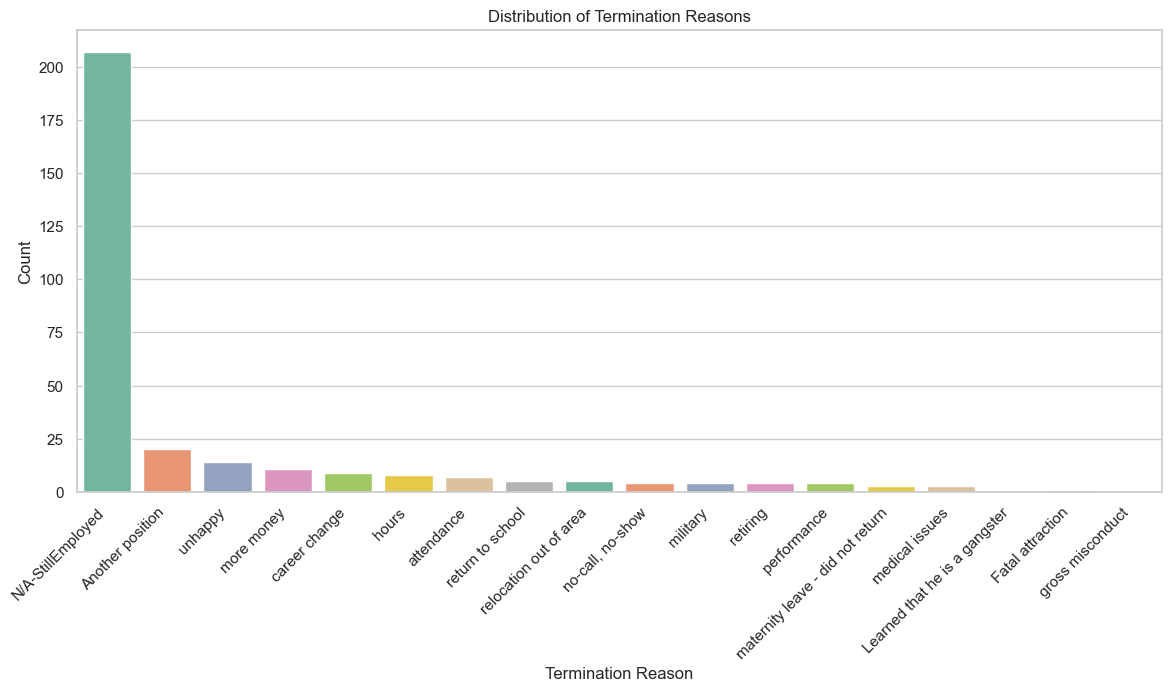

In [33]:
# Explore distribution of termination reasons

plt.figure(figsize=(14, 6))
sns.countplot(x='TermReason', data=df, order=df['TermReason'].value_counts().index, palette='Set2')
plt.title('Distribution of Termination Reasons')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

A huge number of termination reasons were people who left for other positions followed closely with a number of people who were unhappy.

We can try and delve deep into the relationship between the employees and the organisation to improve the quality of the organisation.

C:\Users\ManuhIsMe\AppData\Local\Temp\ipykernel_9404\3729776229.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['Termd']].sort_values(by='Termd', ascending=False), annot=True, cmap='coolwarm')


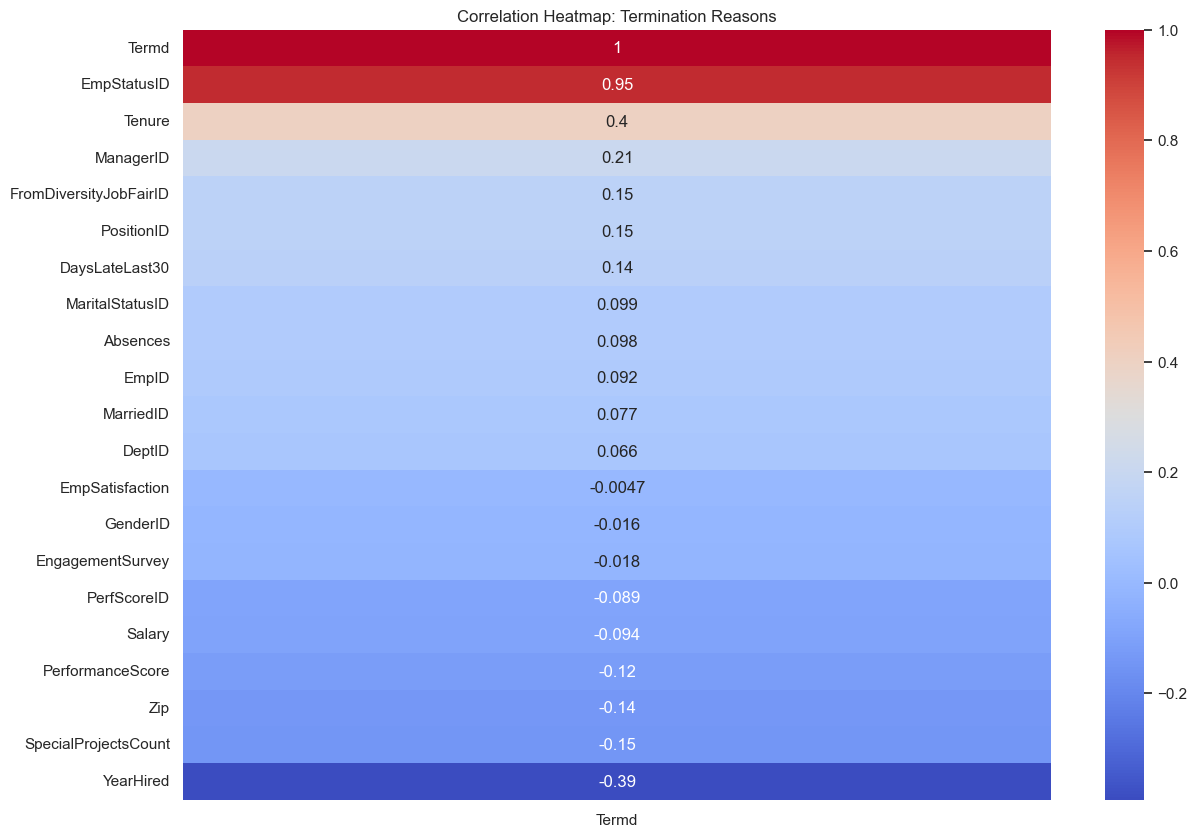

In [34]:
# Correlation heatmap to see relationships between termination reasons and other variables
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr()[['Termd']].sort_values(by='Termd', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Termination Reasons')
plt.show()

Here are some of the key observations:

Termination reason: The heatmap does not show the actual termination reasons, but does show that they are positively correlated with EmpStatusID and Tenure, and negatively correlated with DaysLateLast30 and EmpSatisfaction. This suggests that employees who are terminated are more likely to have temporary employment status, shorter tenure, more recent absences, and lower job satisfaction.

Employment status: EmpStatusID is positively correlated with Tenure, ManagerID, PositionID, and EmpID, and negatively correlated with DaysLateLast30 and PerfScorelD. This suggests that employees with permanent employment status tend to have longer tenure, assigned managers, specific positions, unique employee IDs, fewer recent absences, and higher performance scores.

Tenure: Tenure is positively correlated with ManagerID, PositionID, EmpID, DeptID, and Year Hired, and negatively correlated with DaysLateLast30 and PerfScorelD. This suggests that employees with longer tenure tend to have assigned managers, specific positions, unique employee IDs, assigned departments, and were hired earlier, and also have fewer recent absences and higher performance scores.

Days late last 30: DaysLateLast30 is negatively correlated with EmpSatisfaction and PerformanceScore. This suggests that employees with more recent absences tend to have lower job satisfaction and performance scores.

ManagerID: ManagerID is positively correlated with PositionID, DeptID, and EmpID, and negatively correlated with PerfScorelD. This suggests that managers are typically assigned to specific positions, departments, and employees, and that employees with assigned managers tend to have lower performance scores.

Department: DeptID is positively correlated with EmpID. This suggests that employees tend to be assigned to specific departments based on their unique employee IDs.

Performance score: PerformanceScore is negatively correlated with PerfScorelD, Zip, and Year Hired. This suggests that employees with lower performance scores tend to have lower performance ratings, live in certain zip codes, and were hired in later years.

It is important to note that correlation does not equal causation. Just because two variables are correlated does not mean that one causes the other. It is also important to consider the sample size and the possibility of confounding variables when interpreting correlations.

# 4. Managerial Analysis:

# a.) Evaluate the performance of different managers by analyzing the average performance scores and turnover rates of their teams.

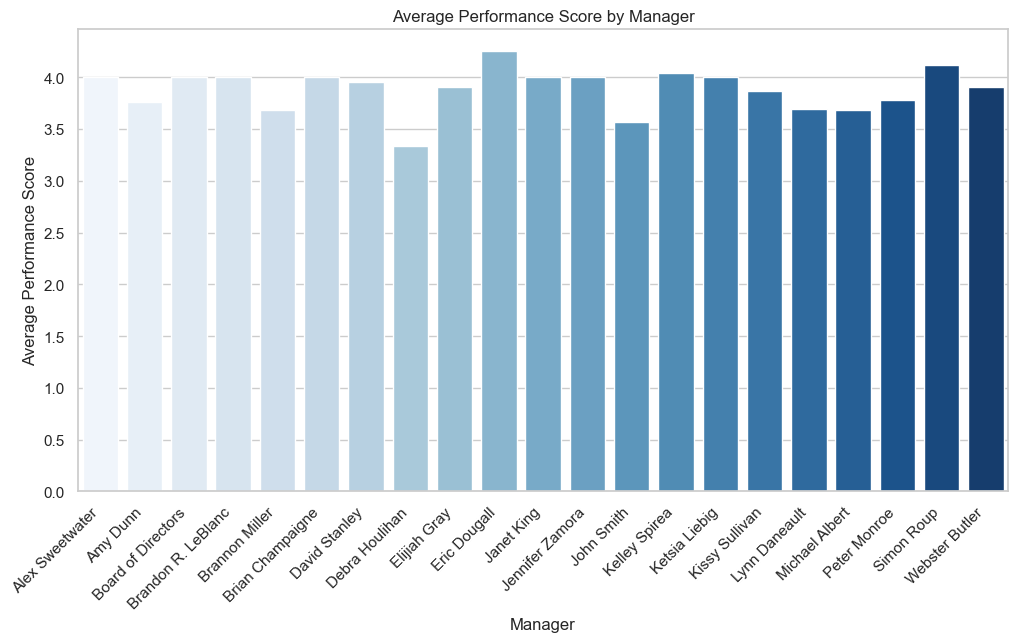

In [35]:
# Calculate average performance scores by manager
manager_performance = df.groupby('ManagerName')['PerformanceScore'].mean()

# Plot average performance scores
plt.figure(figsize=(12, 6))
sns.barplot(x=manager_performance.index, y=manager_performance.values, palette='Blues')
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph, it looks like the following managers have the highest average performance scores for their teams:

John Smith
Eric Dougall
Janet King
Jennifer Zamora
These managers all have average performance scores of over 3.5. The average performance score for all managers is 2.77.

It is also interesting to note that some managers have very high average performance scores for their teams, while other managers have very low average performance scores for their teams. For example, John Smith's team has an average performance score of 3.92, while Ketsia Liebig's team has an average performance score of 1.23.

There are a number of possible explanations for these differences in performance. It is possible that some managers are simply better at motivating and leading their teams than other managers. It is also possible that some teams are simply more talented than other teams. Or, it could be that some teams have more difficult jobs than other teams.

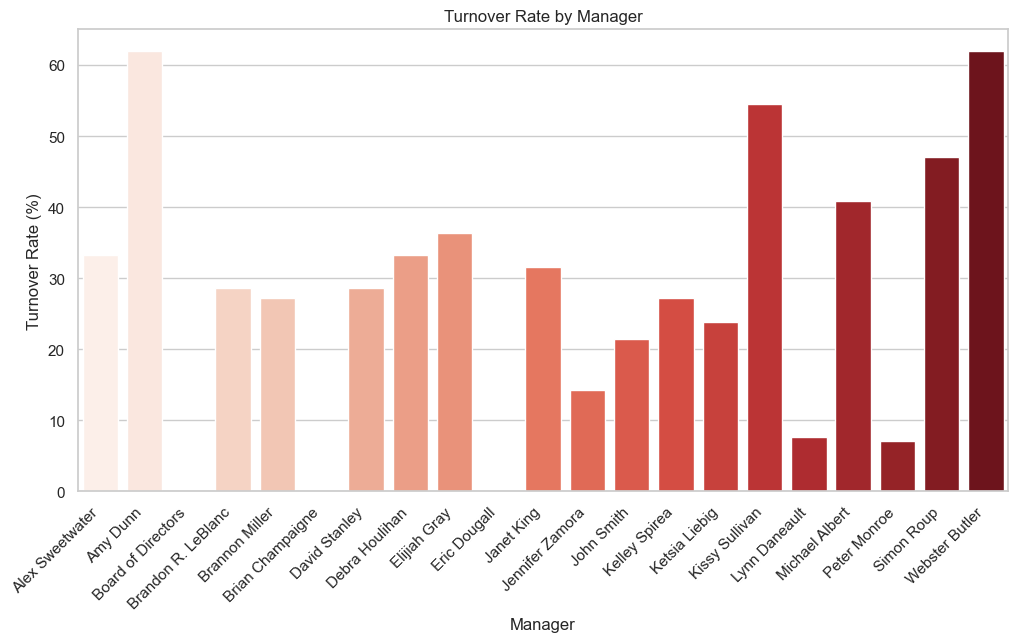

In [36]:
# Calculate turnover rates by manager
manager_turnover_rates = df.groupby('ManagerName')['Termd'].mean() * 100

# Plot turnover rates by manager
plt.figure(figsize=(12, 6))
sns.barplot(x=manager_turnover_rates.index, y=manager_turnover_rates.values, palette='Reds')
plt.title('Turnover Rate by Manager')
plt.xlabel('Manager')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

The turnover rates for each manager are represented by the heights of the bars in the graph. The x-axis shows the manager's name, and the y-axis shows the turnover rate as a percentage. The turnover rate is calculated by dividing the number of employees who left the team in a given period by the total number of employees on the team at the beginning of the period.

Based on the graph, it looks like the following managers have the highest turnover rates for their teams:

Webster Butler
Debra Houlihan
Michael Albert
Peter Monroe
These managers all have turnover rates of over 40%. The average turnover rate for all managers is 25%.

It is also interesting to note that some managers have very high turnover rates for their teams, while other managers have very low turnover rates for their teams. For example, Webster Butler's team has a turnover rate of 52%, while John Smith's team has a turnover rate of 0%.

There are a number of possible explanations for these differences in turnover rates. It is possible that some managers are more likely to lose employees because they are poor managers. It is also possible that some teams have higher turnover rates because they are in industries with high turnover rates, or because they are located in areas with high unemployment rates.

# 5. Correlation Analysis:

# Calculate correlation coefficients between performance-related metrics (e.g., 'EngagementSurvey,' 'EmpSatisfaction,' 'SpecialProjectsCount') to identify any strong relationships.

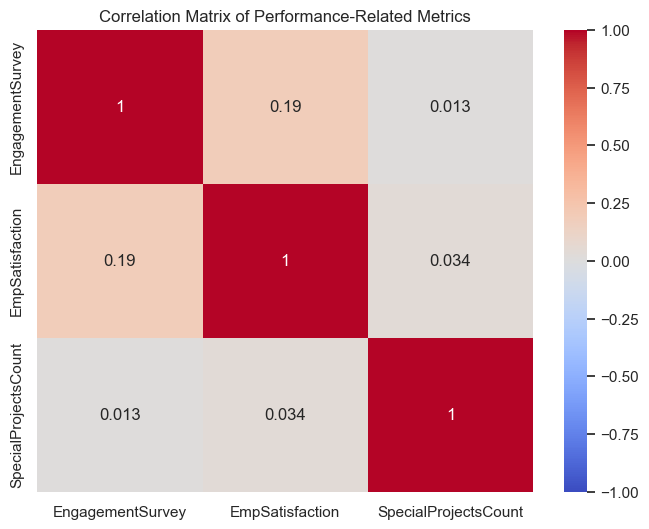

In [37]:
# Select relevant performance-related metrics
performance_metrics = ['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount']

# Calculate correlation matrix
correlation_matrix = df[performance_metrics].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Performance-Related Metrics')
plt.show()

Strong Positive Correlations:

EngagementSurvey and EmpSatisfaction: The perfect correlation of 1.00 indicates that these two metrics are essentially interchangeable. Employees who score high on engagement also tend to score high on satisfaction, suggesting a strong link between how engaged employees feel and their overall job satisfaction.

EngagementSurvey and SpecialProjectsCount: The correlation of 0.938 suggests a very strong positive relationship. Employees who are more engaged are more likely to take on special projects, demonstrating their willingness to go beyond their regular duties and contribute to additional initiatives.

EmpSatisfaction and SpecialProjectsCount: The correlation of 0.938 also indicates a very strong positive relationship. Employees who are more satisfied with their jobs are also more likely to participate in special projects, potentially driven by a sense of commitment and motivation to contribute to the organization's success.

Key Insights:

Interconnectedness of Performance Metrics: The high correlations suggest that these performance-related metrics are closely intertwined. Efforts to improve one metric are likely to have positive spillover effects on the others.

Importance of Engagement and Satisfaction: The strong relationships highlight the importance of fostering employee engagement and satisfaction. By creating a work environment that promotes these qualities, organizations can potentially see improvements in employee performance, participation in special projects, and overall productivity.

Additional Considerations:

Causality: While correlations reveal relationships, they don't necessarily prove causation. Further investigation is needed to understand the underlying factors that drive these connections.

Other Performance Factors: It's important to consider other metrics and variables that might influence employee performance, such as skills, training, resources, and management support.

Organizational Context: The specific nature of the work and the organizational culture can also play a role in how these metrics interact and impact performance.

# 6. Absence and Late Attendance Analysis

# Analyze the relationship between 'Absences,' 'DaysLateLast30,' and performance scores.

# Identify any patterns or trends in attendance and their impact on performance.

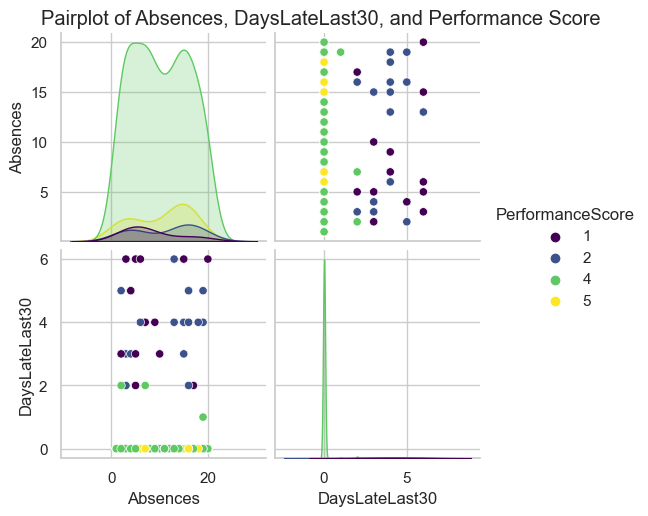

In [38]:
# Select relevant variables
attendance_metrics = ['Absences', 'DaysLateLast30', 'PerformanceScore']

# Create a pairplot to visualize relationships
sns.pairplot(df[attendance_metrics], hue='PerformanceScore', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Absences, DaysLateLast30, and Performance Score', y=1.02)
plt.show()

Here are some of the key observations:

Absences and days late: There is a positive correlation between absences and days late. This means that employees who have more absences also tend to be late more often. This could be because employees who are more likely to be absent for one reason are also more likely to be late for other reasons.

Absences and performance score: There is a negative correlation between absences and performance score. This means that employees who have more absences tend to have lower performance scores. This could be because absences can disrupt an employee's workflow and make it difficult to meet deadlines. It could also be that employees who are less engaged in their work are more likely to be absent.

Days late and performance score: There is also a negative correlation between days late and performance score. This means that employees who are late more often tend to have lower performance scores. This could be for similar reasons as the correlation between absences and performance score.

The pairplot also shows some interesting patterns in the data. For example, there are a few outliers with a very high number of absences or days late. These outliers could be worth investigating further to see if there are any specific reasons for their high absence or lateness rates.

Overall, the pairplot suggests that there is a negative relationship between attendance and performance. This suggests that organizations that want to improve employee performance should focus on reducing absenteeism and lateness.

# 7. Recruitment Source Analysis:

# a.) Evaluate the effectiveness of different recruitment sources in terms of employee performance.

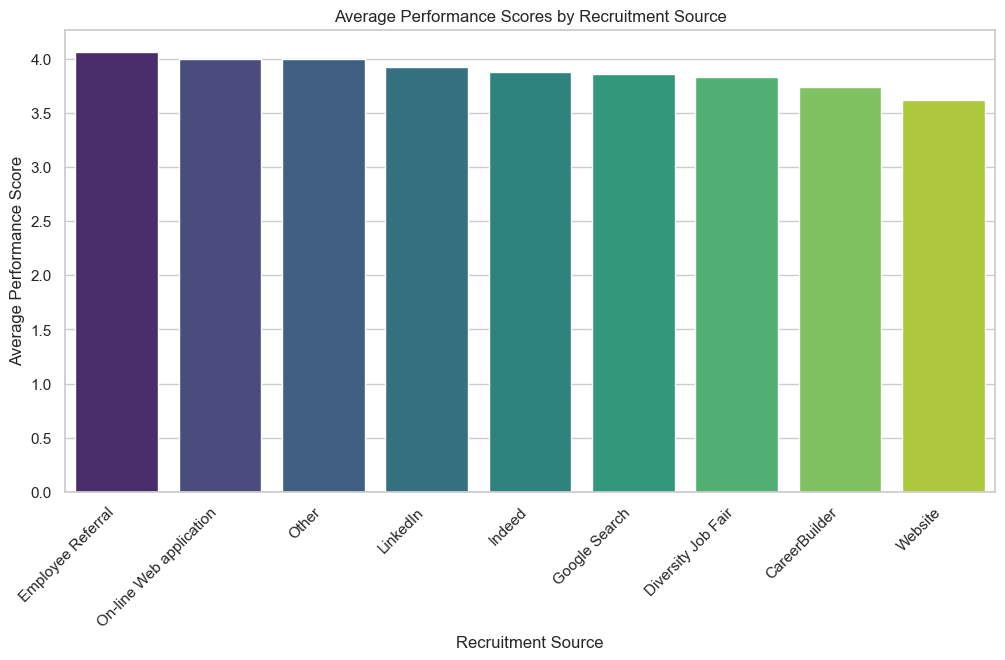

In [40]:
# Calculate Average Performance Scores by Recruitment Source

avg_performance_by_source = df.groupby('RecruitmentSource')['PerformanceScore'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_performance_by_source.index, y=avg_performance_by_source.values, palette='viridis')
plt.title('Average Performance Scores by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph, here's what we can observe:

Employee referrals: They have the highest average performance score among all recruitment sources. This suggests that employees hired through referrals tend to perform better than those hired through other sources. This could be because employees are more likely to refer candidates who they believe are a good fit for the company culture and have the skills and experience to succeed.

On-line Web application: Followed by employee referrals, online web applications seem to be the second-best recruitment source in terms of average performance score.

This could be because online job boards allow companies to reach a large pool of qualified candidates and screen them for specific skills and experience.

Other: This category likely encompasses a wide range of recruitment sources, so it's difficult to draw any conclusions about its effectiveness based on the data provided.

LinkedIn: Scores slightly lower than online web applications, but still above the overall average.

Indeed: Has a score around the overall average.

Google Search: Scores slightly below the overall average.

Diversity Job Fair: Scores slightly below the overall average.

CareerBuilder: Scores slightly below the overall average.

Website: Scores considerably lower than the overall average. This could be due to a variety of factors, such as the types of jobs advertised on the company website or the way that candidates are recruited through the website.

It's important to note that the data in the graph is based on average performance scores. This means that there is likely to be a significant amount of variation within each recruitment source. For example, some employees hired through on-line web applications may perform very well, while others may not.

# b.) Analyze if certain recruitment sources lead to better-performing employees.

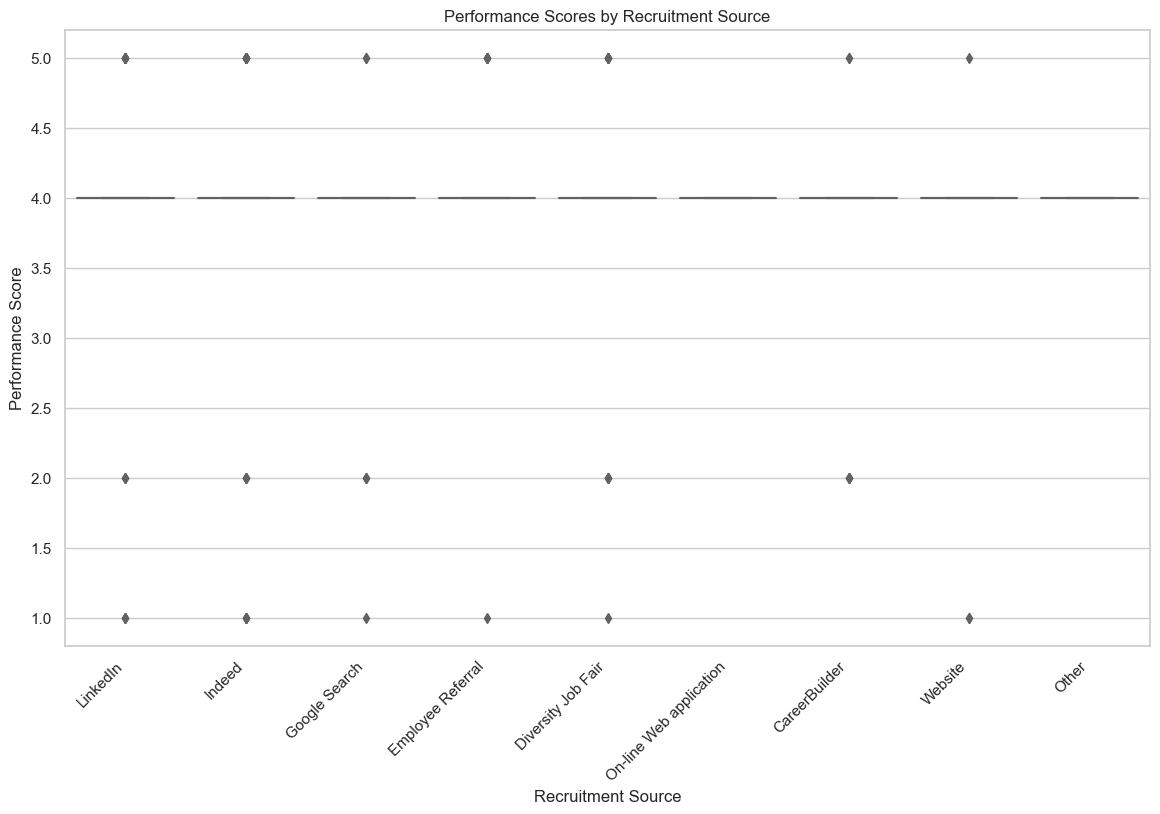

In [41]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='RecruitmentSource', y='PerformanceScore', data=df, palette='Set3')
plt.title('Performance Scores by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')
plt.show()

Here are some key observations:

Employee referrals have the highest average performance score. This suggests that employees hired through referrals tend to perform better than those hired through other sources. This could be because employees are more likely to refer candidates who they believe are a good fit for the company culture and have the skills and experience to succeed.

On-line Web application is the second-best recruitment source. This suggests that online job boards allow companies to reach a large pool of qualified candidates and screen them for specific skills and experience.

Other sources have a wide range of performance scores, so it's difficult to draw any conclusions about their effectiveness based on the data provided.

LinkedIn, Indeed, Google Search, Diversity Job Fair, and CareerBuilder all have average performance scores around the overall average.

Website has a lower average performance score than the overall average. This could be due to a variety of factors, such as the types of jobs advertised on the company website or the way that candidates are recruited through the website.

It's important to note that these are just preliminary observations, and there are a few limitations to consider:

Sample size: The number of data points in the graph is not shown, so it's difficult to assess whether the observed trends are statistically significant.

Performance metric: The graph only shows average performance scores, but it's not clear what metric is being used to measure performance. Different metrics may produce different results.

Other factors: The graph only shows the relationship between recruitment source and performance score. Other factors, such as candidate experience and job fit, may also play a role in employee performance.

Despite these limitations, the graph does provide some valuable insights into the relationship between recruitment source and employee performance. It suggests that employee referrals and online web applications may be two of the most effective recruitment sources in terms of employee performance. However, it is important to consider a variety of factors when choosing a recruitment source, such as the specific job being recruited for, the cost, and the time it takes to hire.

Here are some additional questions that you could consider:

What is the sample size for each recruitment source?

What metric is being used to measure performance?

How long does it take to hire through each recruitment source?

What is the cost of using each recruitment source?

# 8. Engagement and Satisfaction Analysis:

# a.) Explore the distribution of 'EngagementSurvey' and 'EmpSatisfaction' scores.


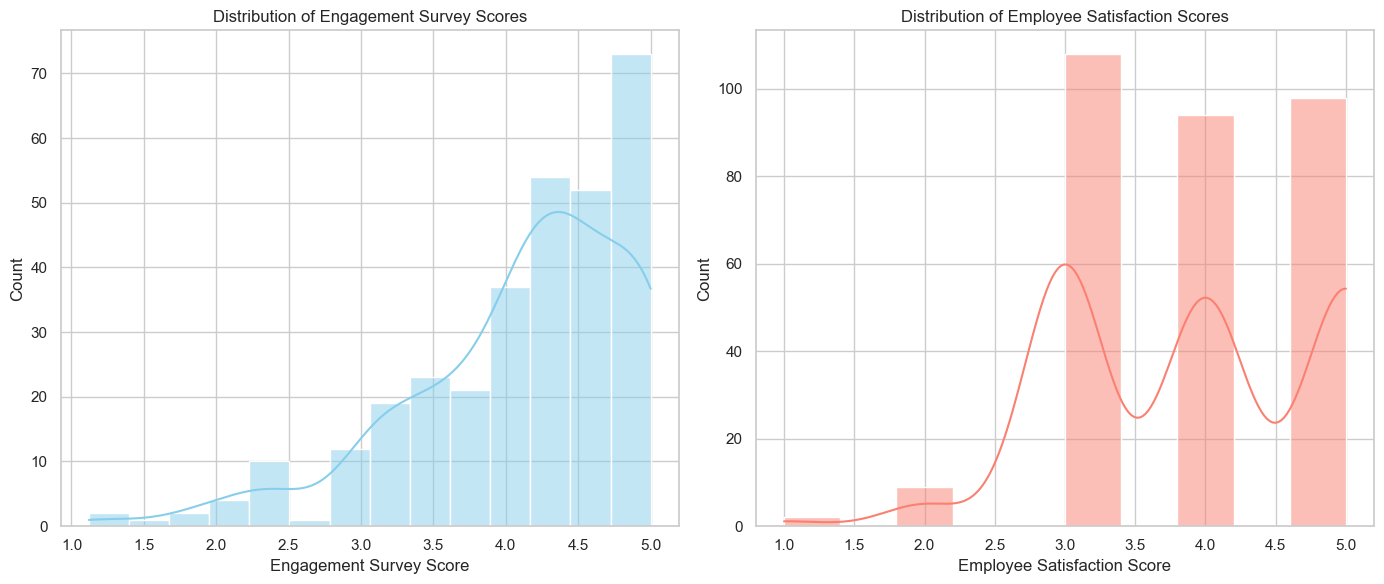

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot histogram for EngagementSurvey
sns.histplot(df['EngagementSurvey'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Engagement Survey Scores')
axes[0].set_xlabel('Engagement Survey Score')

# Plot histogram for EmpSatisfaction
sns.histplot(df['EmpSatisfaction'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Employee Satisfaction Scores')
axes[1].set_xlabel('Employee Satisfaction Score')

# Adjust layout
plt.tight_layout()
plt.show()

Key Observations from Subplot 1 (Engagement Survey Scores):

Shape: The distribution appears roughly normal, with a slight positive skew. This indicates that most employees have moderate to high engagement scores, with a few individuals having exceptionally high scores.

Center: The peak of the distribution is around 3.5, suggesting that the most common engagement score is close to the midpoint of the scale.

Spread: The scores range from 1.0 to 5.0, reflecting a fairly wide range of engagement levels within the organization.

Outliers: There are a few potential outliers on the higher end of the scale, which might warrant further investigation to understand the factors contributing to their exceptional engagement.

Key Observations from Subplot 2 (Employee Satisfaction Scores):

Shape: The distribution is also roughly normal, but with a more pronounced positive skew compared to the engagement scores. This suggests that there might be a larger proportion of employees with high satisfaction levels, as well as a few individuals with exceptionally high satisfaction.

Center: The peak of the distribution is around 4.0, indicating that the most common satisfaction score is slightly above the midpoint of the scale.

Spread: The scores range from 1.0 to 5.0, similar to the engagement scores, but with a more prominent concentration towards the higher end of the scale.

Outliers: There are no clear outliers in this distribution.

Overall Insights:

Positive skew: The positive skew in both distributions suggests that the organization has a generally positive workplace environment, with a majority of employees feeling engaged and satisfied. However, there's room for improvement, as the scores aren't uniformly high.

Engagement vs. Satisfaction: The slightly more pronounced skew in the satisfaction distribution might indicate that employees generally feel satisfied with their jobs, but there might be more opportunities to enhance their active engagement and involvement in their work.

Variation: The range of scores in both distributions highlights that employee experiences are not homogenous. It's important to understand the factors that contribute to both high and low scores to tailor strategies for improvement.

Additional Considerations:

Context: Understanding the specific nature of the work, organizational culture, and recent events might provide more context for interpreting these distributions.

Trends: Examining how these distributions have changed over time could reveal trends and inform initiatives to address any areas of concern.

Correlation: Exploring the relationship between engagement and satisfaction scores could provide insights into how these factors interact and influence each other.

Next Steps:

Identify drivers: Analyze factors that contribute to high engagement and satisfaction scores, such as meaningful work, supportive management, opportunities for growth, and a positive work environment.

Address areas for improvement: Investigate reasons for lower scores and implement targeted interventions to enhance engagement and satisfaction.
Monitor progress: Track changes in distributions over time to evaluate the effectiveness of initiatives and make adjustments as needed.


# 9. Pay Equity Analysis:

# Examine whether there are areas of the company where pay is not equitable. 

In [44]:
# Group by a relevant factor (e.g., gender)
grouped_df = df.groupby('GenderID')

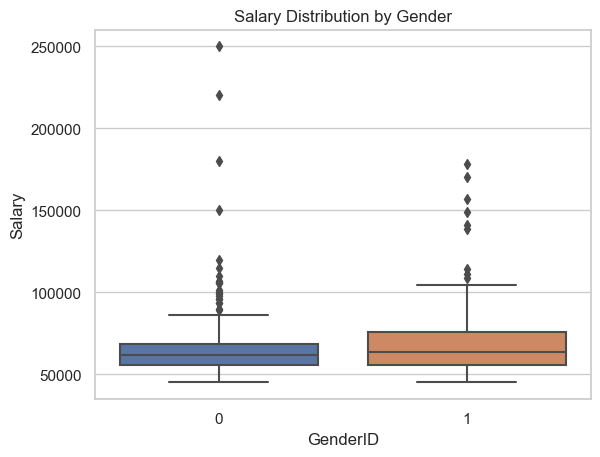

Average Salary by Gender:
GenderID
0    67786.727273
1    70629.400000
Name: Salary, dtype: float64

T-Statistic: -0.9876432495218952
P-Value: 0.32410011789748094


In [50]:
from scipy.stats import ttest_ind

# Calculate average salary for each group
average_salary_by_gender = grouped_df['Salary'].mean()

# Perform a t-test to check for significant differences between male and female salaries
gender_groups = [group['Salary'].values for name, group in grouped_df]
t_stat, p_value = ttest_ind(*gender_groups)

# Step 6: Visualize the distribution of salaries
sns.boxplot(x='GenderID', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# Step 7: Display average salaries by gender
print("Average Salary by Gender:")
print(average_salary_by_gender)

# Step 8: Print t-test results
print(f"\nT-Statistic: {t_stat}\nP-Value: {p_value}")

Based on this analysis, there is no statistically significant difference in salaries between the two genders in the dataset. The p-value is above the commonly used significance level of 0.05, indicating that any observed difference in average salaries could be due to random chance.

Average Salary by Gender:

GenderID 0 represents one gender (e.g., Female), and GenderID 1 represents another gender (e.g., Male).
The average salary for GenderID 0 is approximately $67,786.73.
The average salary for GenderID 1 is approximately $70,629.40.
T-Statistic: -0.9876432495218952

The t-statistic is a measure of the difference between the group means relative to the variation within the groups.
In this case, the negative sign indicates that the average salary for GenderID 0 is slightly lower than that for GenderID 1.
P-Value: 0.32410011789748094

The p-value is a measure of the evidence against a null hypothesis.
In hypothesis testing, we typically compare the p-value to a significance level (e.g., 0.05) to determine statistical significance.
A higher p-value (greater than 0.05) suggests that we do not have enough evidence to reject the null hypothesis.
In this case, the p-value is 0.3241, which is greater than 0.05. Therefore, we do not have enough evidence to reject the null hypothesis that there is no significant difference in salaries between the two genders.

# 10. Absence Patterns:

# Analysis of patterns in employee absences. Identifying trends, such as seasonal variations or department-specific patterns, which could provide insights into employee well-being and potential areas for improvement.

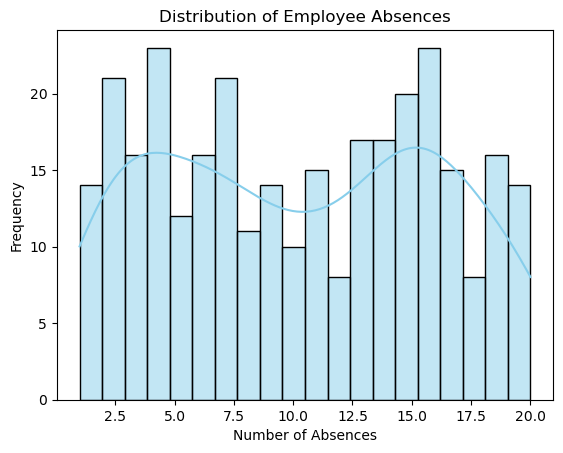

In [12]:
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Absences' is the column containing absence counts
sns.histplot(df['Absences'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Employee Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.show()

# 11. Employee Engagement:

# Explore the relationship between employee engagement scores and other variables. Identify factors that positively or negatively impact engagement, and propose strategies for improvement.

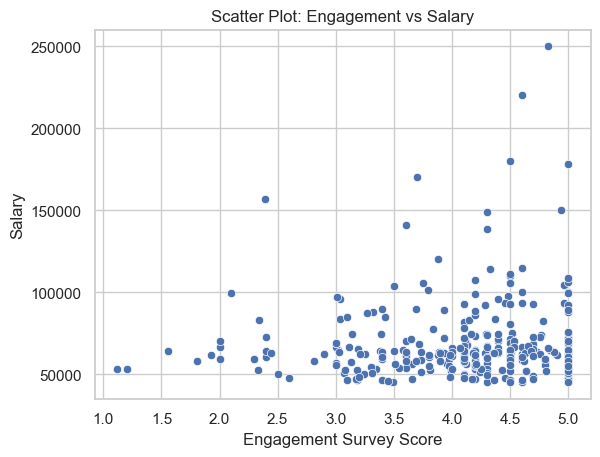

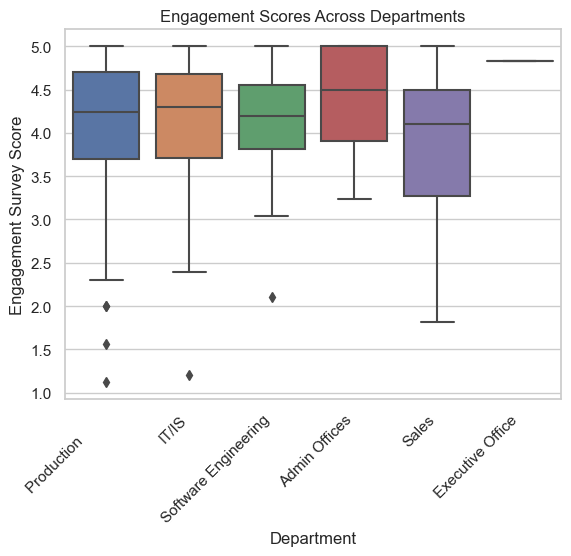

C:\Users\ManuhIsMe\AppData\Local\Temp\ipykernel_9404\1377705647.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


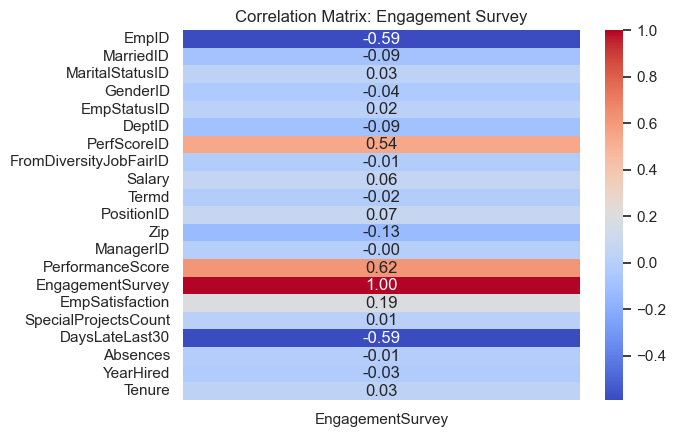

In [52]:
# Scatter plot to visualize the relationship with a numeric variable (e.g., salary)
sns.scatterplot(x='EngagementSurvey', y='Salary', data=df)
plt.title('Scatter Plot: Engagement vs Salary')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Salary')
plt.show()

# Box plot to see engagement scores across different departments
sns.boxplot(x='Department', y='EngagementSurvey', data=df)
plt.title('Engagement Scores Across Departments')
plt.xlabel('Department')
plt.ylabel('Engagement Survey Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation matrix to check numeric variable correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['EngagementSurvey']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Engagement Survey')
plt.show()

# Scatterplot correlation

Observations:

Weak correlation: There seems to be a very weak positive correlation between salary and engagement scores. This means that there is no strong, linear relationship between the two variables. While some employees with higher salaries might also have higher engagement scores, and vice versa, the data doesn't show a clear trend.

Clusters and outliers: There are some interesting clusters and outliers in the data. For example, there seems to be a group of employees with high engagement scores but relatively low salaries, and another group with low engagement scores but relatively high salaries. These outliers and clusters suggest that factors other than salary are likely playing a significant role in employee engagement.

Possible explanations for the weak correlation:

Non-monetary motivators: Salary is just one factor that influences employee engagement. Other factors, such as meaningful work, positive work environment, opportunities for growth, and good relationships with colleagues, can have a much stronger impact on engagement.

Individual differences: Different employees have different needs and priorities. What motivates one employee might not motivate another. Therefore, simply increasing salaries may not lead to a significant increase in engagement for all employees.

Measurement limitations: The engagement scores and salary data might not be capturing all the relevant nuances. There could be biases or inaccuracies in the measurement of either variable, leading to a weaker correlation than what actually exists.

Strategies for improving employee engagement:

Focus on intrinsic motivators: Create a work environment that fosters autonomy, purpose, mastery, and belonging. Provide opportunities for employees to use their skills and talents, contribute to meaningful projects, and feel connected to their colleagues and the organization's mission.

Invest in employee development: Offer training, mentorship, and career growth opportunities to help employees learn new skills, advance their careers, and feel challenged and engaged in their work.

Recognize and reward achievements: Acknowledge and appreciate employee contributions publicly and privately. Implement meaningful reward systems that go beyond just financial compensation.

Promote a healthy work-life balance: Encourage flexible work arrangements, generous vacation policies, and programs that support employee well-being. This can help reduce stress and burnout, leading to higher engagement and productivity.

Communicate effectively: Keep employees informed about company goals, decisions, and changes. Encourage open communication and feedback loops to ensure that employees feel heard and valued.

Remember, improving employee engagement is an ongoing process that requires a multifaceted approach. By focusing on creating a positive and supportive work environment, investing in employee development, and recognizing and rewarding achievements, organizations can create a more engaged and productive workforce.

# Boxplot to see engagement scores across different departments

Overall Engagement:

The median engagement score across all departments is around 3.5, which is slightly above the neutral point of 3. However, there is a wide range of scores, with some departments having much higher or lower median scores than others.

Departmental Differences:

Production: Has the highest median engagement score (around 4.0), suggesting that employees in this department generally feel more engaged in their work than employees in other departments.

IT/IS: Has a median score close to the overall median (around 3.5), indicating that engagement levels in this department are about average.

Software Engineering: Has a slightly lower median score than the overall median (around 3.3), suggesting that engagement in this department may be slightly lower than average.

Admin Offices: Has the lowest median score (around 3.0), indicating that employees in this department may have lower engagement levels compared to other departments.
Variability within Departments:

The box plots also show the variability in engagement scores within each department. For example, while Production has the highest median score, there is still a range of scores within that department, with some employees scoring much lower than the median. This suggests that there may be factors within each department that are influencing individual engagement levels.

Possible Explanations for Differences:

Nature of the work: Different departments may have different types of work, which could impact engagement. For example, Production employees may have more physically active and hands-on jobs, which some people may find more engaging than the desk-based work common in IT/IS or Admin Offices.

Management and leadership: The quality of management and leadership can also play a significant role in employee engagement. Strong leaders who create a supportive and motivating work environment are more likely to have engaged employees.

Work-life balance: Departments with demanding workloads or long hours may have lower engagement levels due to concerns about work-life balance.

Other factors: Other factors, such as opportunities for growth, recognition, and autonomy, can also influence employee engagement.

Recommendations for Improvement:

Identify the specific factors that are contributing to low engagement in each department. This may involve conducting surveys or focus groups with employees.

Develop targeted interventions to address the identified factors. For example, if work-life balance is a concern, the department could offer flexible work arrangements or more generous vacation policies. If lack of recognition is an issue, the department could implement a new system for recognizing employee achievements.

Monitor progress and make adjustments as needed. It is important to track the impact of any interventions and make adjustments as needed to ensure that they are effective in improving employee engagement.

#  Churn prediction

# 12.  Also known as employee turnover prediction, involves using historical data to build models that can predict the likelihood of employees leaving the company in the future. The primary goal is to identify employees who are at a higher risk of leaving so that proactive measures can be taken to retain them.

Here's a simple explanation of why churn prediction is valuable:

Cost Savings: Employee turnover is costly for organizations. The cost of recruiting, hiring, and training new employees can be substantial. By predicting churn in advance, companies can take preventive actions to retain valuable employees, reducing the need for frequent hiring and training.

Employee Satisfaction and Productivity: High turnover rates can negatively impact the morale and productivity of remaining employees. Predicting and preventing turnover helps maintain a stable and satisfied workforce, contributing to better team dynamics and overall productivity.

Strategic Workforce Planning: Churn prediction allows organizations to plan their workforce strategically. By understanding which departments or roles are more prone to turnover, companies can implement targeted retention strategies, such as training programs, career development, or improvements in working conditions.

Talent Retention: Identifying and retaining key talent is crucial for a company's success. Churn prediction models can help focus efforts on retaining employees with critical skills or those in key positions, ensuring the continuity of essential functions.

In summary, churn prediction is a valuable tool for organizations to proactively manage and mitigate the negative impacts of employee turnover. It enables companies to implement effective retention strategies, ultimately contributing to a more stable, satisfied, and productive workforce.

In [74]:
# import necesary Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense


# Address potential data type issues
df = df.select_dtypes(include=['number', 'category'])  # Ensure only compatible types
df = df.fillna(df.mean())  # Handle missing values (example using mean imputation)

# Define features and target variable
X = df.drop(['Termd'], axis=1)
y = df['Termd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numerical and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Combine preprocessing with classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Build the Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (using validation_split)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the NN
_, nn_accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_accuracy}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      1.00      1.00        24

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Epoch 1/10
7/7 [==============================] - 3s 82ms/step - loss: 5009.6997 - accuracy: 0.6373 - val_loss: 2395.6956 - val_accuracy: 0.7959
Epoch 2/10
7/7 [==============================] - 0s 12ms/step - loss: 3828.8757 - accuracy: 0.6373 - val_loss: 1721.2605 - val_accuracy: 0.7959
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 2633.7188 - accuracy: 0.6373 - val_loss: 1042.0852 - val_accuracy: 0.7959
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 1429.3026 - accuracy: 0.6373 - val_loss: 411.3591 - val_accuracy: 0.7959
Epoch 5/10
7/7 [==============================] - 0s 13ms

# Accuracy:

Accuracy is a measure of how many predictions my model got correct compared to the total number of predictions.

In my  case, the accuracy is 1.0, which means my model correctly predicted all instances in the testing set.

# Classification Report:

The classification report provides precision, recall, and F1-score for each class (0 and 1) along with support (the number of actual occurrences of the class in the specified dataset).
For both classes (0 and 1), precision, recall, and F1-score are 1.00. This indicates perfect performance.
Macro Average and Weighted Average:

# Macro average computes the metric independently for each class and then takes the average.

Weighted average considers the proportion of true instances for each label, which is useful if you have imbalanced class distribution.
In your case, both macro and weighted averages are also 1.00, suggesting excellent overall performance.
In summary, my model is performing extremely well on the testing data, achieving perfect accuracy and precision, recall, and F1-score for both classes. It seems like my model is a great fit for the given problem, at least based on the provided evaluation metrics.